In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
#!pip install scikit-learn
from sklearn.cluster import KMeans

In [2]:
df_cleaning_original = pd.read_csv('df_cleaned.csv')
df = df_cleaning_original.copy()
df0 = df.copy()

C:\Users\Adel\AppData\Local\Temp\ipykernel_24144\2041666452.py:1: DtypeWarning: Columns (55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaning_original = pd.read_csv('df_cleaned.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(1)

Column1           make_model short_description           make  \
0        0  Mercedes-Benz A 160               CDi  Mercedes-Benz   

           model                                           location  price  \
0  \n, A 160 ,\n  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...  16950   

  body_type  type  doors country_version     offer_number   warranty  \
0   Compact  Used    5.0   \n, Spain, \n  \n, 7468157, \n  24 months   

    mileage first_registration gearbox fuel_type colour     paint  \
0  120200.0         01/06/2016  Manual    Diesel  Black  Metallic   

                                                desc  seller  seats power  \
0   ,Precio al contado: 16950 euros, , ,Vehículo ...  Dealer    NaN   NaN   

   engine_size  gears co_emissions manufacturer_colour drivetrain  cylinders  \
0          NaN    NaN          NaN                 NaN        NaN        NaN   

  fuel_consumption comfort_convenience entertainment_media safety_security  \
0              NaN                 NaN                 NaN             NaN   

  extras  empty_weight model_code general_inspection last_service  \
0    NaN           NaN        NaN                NaN          NaN   

  full_service_history non_smoker_vehicle emission_class emissions_sticker  \
0                  NaN                NaN            NaN               NaN   

  upholstery production_date  previous_owner other_fuel_types  \
0        NaN             NaN             NaN              NaN   

   power_consumption energy_efficiency_class co_efficiency  \
0                NaN                     NaN           NaN   

   fuel_consumption_wltp co_emissions_wltp available_from taxi_or_rental_car  \
0                    NaN               NaN            NaN                NaN   

   availability last_timing_belt_change electric_range_wltp  \
0           NaN                     NaN                 NaN   

  power_consumption_wltp battery_ownership country new_fuel_type  paint2  \
0                    NaN               NaN      ES        Diesel       1   

   power_kwh  co2_emissions fuel_consumption_comb fuel_consumption_city  \
0        NaN            NaN                   NaN                   NaN   

  fuel_consumption_country  
0                      NaN

In [5]:
df.rename(columns={'Column1':  "new_index"}, inplace=True) # please type the name of your column

In [6]:
#df["Column1"]

In [7]:
df.isnull().sum()/len(df)*100

new_index                    0.000000
make_model                   0.000000
short_description            0.743975
make                         0.000000
model                        0.000000
                              ...    
power_kwh                    1.997904
co2_emissions               35.054139
fuel_consumption_comb       18.452672
fuel_consumption_city       29.636745
fuel_consumption_country    29.619280
Length: 66, dtype: float64

In [8]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()
    

<Figure size 1000x500 with 0 Axes>

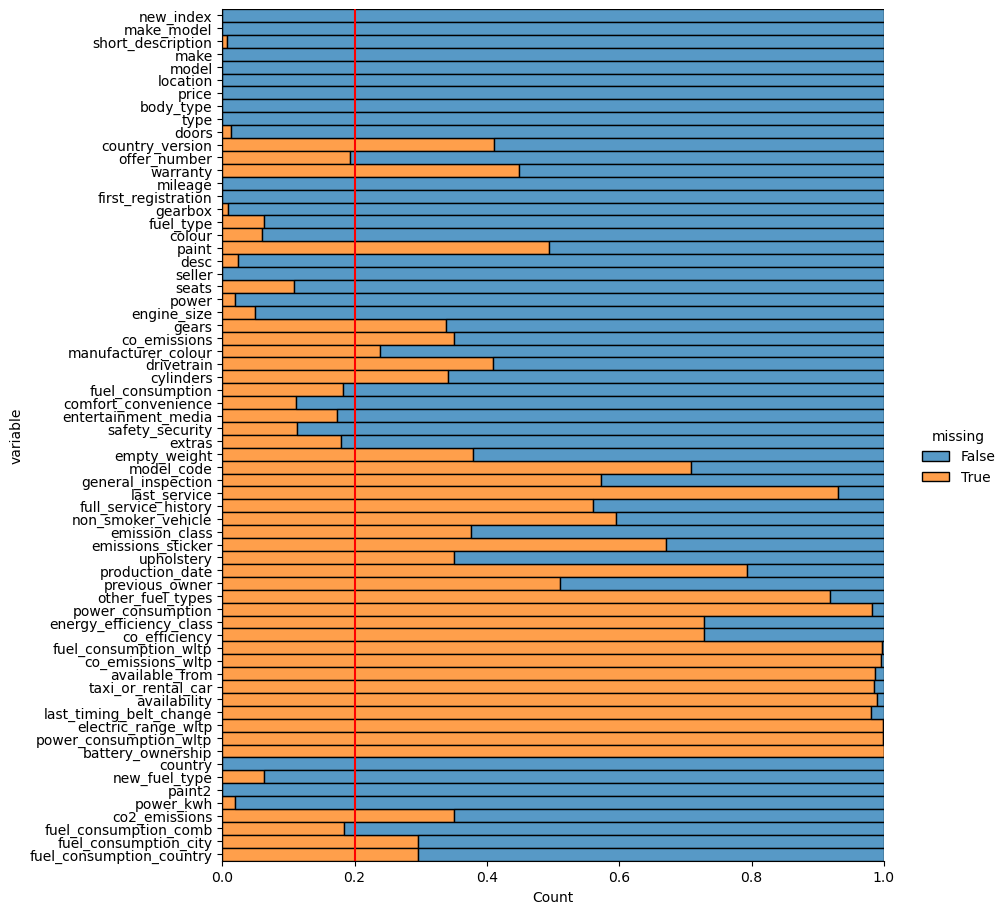

In [9]:
show_nulls(df);

In [10]:
df["doors"].isnull().sum()

359

In [11]:
df.loc[df["doors"].isna(), ["make_model", "body_type"]].value_counts()

make_model              body_type       
Ford Mustang            Coupe               28
                        Convertible         17
Volvo XC60              Sedan                9
Renault Megane          Coupe                8
Volvo V40               Coupe                8
                                            ..
Mercedes-Benz Sprinter  Off-Road/Pick-up     1
Nissan 370Z             Coupe                1
Nissan E-NV200          Station wagon        1
Nissan Juke             Sedan                1
Volvo XC90              Sedan                1
Length: 188, dtype: int64

In [12]:
df["doors"].mode()

0    5.0
Name: doors, dtype: float64

In [13]:
df["doors"].value_counts(dropna=False)

5.0    17481
2.0     5523
4.0     3001
3.0     2259
NaN      359
6.0        5
1.0        2
Name: doors, dtype: int64

In [14]:
df["doors"] = df["doors"].astype("str") #convert to string

In [15]:
df["doors_2"] = df.groupby(["make_model", "body_type"])["doors"].transform(lambda x : x.mode()[0])
df["doors_2"].value_counts() #mode of "doors" by make_model and body_type

5.0    19647
2.0     5862
3.0     1665
4.0     1396
nan       60
Name: doors_2, dtype: int64

In [16]:
df["doors_2"].isnull().sum() 

0

In [17]:
df.loc[df["doors"] == "nan", "doors"] = df.loc[df["doors"] == "nan", "doors_2"]
df["doors"].value_counts()  #filled "nan" values with values from "doors_2"

5.0    17597
2.0     5662
4.0     3010
3.0     2304
nan       50
6.0        5
1.0        2
Name: doors, dtype: int64

In [18]:
df["doors"].replace({"nan": "5.0"}, inplace=True)

In [19]:
df["doors"].value_counts(dropna=False)

5.0    17647
2.0     5662
4.0     3010
3.0     2304
6.0        5
1.0        2
Name: doors, dtype: int64

In [20]:
df.shape

(28630, 67)

In [21]:
df.drop("country_version", axis=1, inplace=True)

In [22]:
df.drop("offer_number", axis=1, inplace=True)

In [23]:
df["country"].value_counts(dropna=False)

DE    12643
ES     6517
NL     2929
IT     2497
BE     1873
FR     1473
AT      660
LU       35
DK        1
EE        1
BG        1
Name: country, dtype: int64

In [24]:
df["warranty"].value_counts(dropna=False)

NaN           12846
12 months      9545
Yes            2319
24 months      1515
60 months       968
              ...  
55 months         1
99 months         1
122 months        1
44 months         1
4 months          1
Name: warranty, Length: 66, dtype: int64

In [25]:
df["warranty"].isna().sum()

12846

In [26]:
df["warranty"] = df["warranty"].str.replace(" months", "")
df["warranty"].value_counts(dropna=False) 

NaN    12846
12      9545
Yes     2319
24      1515
60       968
       ...  
55         1
99         1
122        1
44         1
4          1
Name: warranty, Length: 66, dtype: int64

In [27]:
df["warranty"]= df["warranty"].replace("Yes", 1)
df["warranty"].value_counts(dropna=False)  # converted yes to 1

NaN    12846
12      9545
1       2319
24      1515
60       968
       ...  
55         1
99         1
122        1
44         1
4          1
Name: warranty, Length: 66, dtype: int64

In [28]:
df["warranty"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: warranty
Non-Null Count  Dtype 
--------------  ----- 
15784 non-null  object
dtypes: object(1)
memory usage: 223.8+ KB


In [29]:
df["warranty"] = df["warranty"].astype(float)

In [30]:
df["warranty_2"] = df["warranty"].apply(lambda x : 0 if pd.isnull(x) else 1 if x <= 12  else 2 )
df.warranty_2.value_counts() # zero for no warranty, one for 12 months warranty, two for more than 12 months warranty

0    12846
1    12628
2     3156
Name: warranty_2, dtype: int64

In [31]:
df["warranty"] = df["warranty_2"]

In [32]:
df.drop(['warranty_2', 'doors_2'] , axis=1, inplace=True)

In [33]:
df.head(2)

new_index             make_model short_description           make  \
0          0    Mercedes-Benz A 160               CDi  Mercedes-Benz   
1          1  Mercedes-Benz EQE 350              350+  Mercedes-Benz   

             model                                           location  price  \
0    \n, A 160 ,\n  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...  16950   
1  \n, EQE 350 ,\n       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES  80900   

  body_type            type doors  warranty   mileage first_registration  \
0   Compact            Used   5.0         2  120200.0         01/06/2016   
1   Compact  Pre-registered   4.0         2    5000.0         01/06/2022   

     gearbox fuel_type colour     paint  \
0     Manual    Diesel  Black  Metallic   
1  Automatic  Electric    NaN       NaN   

                                                desc  seller  seats  \
0   ,Precio al contado: 16950 euros, , ,Vehículo ...  Dealer    NaN   
1   ,Precio al contado: 88900 euros, ,AUTO OJA S....  Dealer    5.0   

                 power  engine_size  gears    co_emissions  \
0                  NaN          NaN    NaN             NaN   
1  \n215 kW (292 hp)\n          1.0    9.0  0 g/km (comb.)   

  manufacturer_colour drivetrain  cylinders fuel_consumption  \
0                 NaN        NaN        NaN              NaN   
1     Negro Obsidiana        NaN        NaN              NaN   

  comfort_convenience entertainment_media safety_security extras  \
0                 NaN                 NaN             NaN    NaN   
1                 NaN                 NaN             NaN    NaN   

   empty_weight model_code general_inspection last_service  \
0           NaN        NaN                NaN          NaN   
1           NaN        NaN                NaN          NaN   

  full_service_history non_smoker_vehicle emission_class emissions_sticker  \
0                  NaN                NaN            NaN               NaN   
1                  NaN                NaN            NaN               NaN   

  upholstery production_date  previous_owner other_fuel_types  \
0        NaN             NaN             NaN              NaN   
1        NaN             NaN             NaN              NaN   

   power_consumption energy_efficiency_class co_efficiency  \
0                NaN                     NaN           NaN   
1                NaN                     NaN           NaN   

   fuel_consumption_wltp co_emissions_wltp available_from taxi_or_rental_car  \
0                    NaN               NaN            NaN                NaN   
1                    NaN               NaN            NaN                NaN   

   availability last_timing_belt_change electric_range_wltp  \
0           NaN                     NaN                 NaN   
1           NaN                     NaN                 NaN   

  power_consumption_wltp battery_ownership country new_fuel_type  paint2  \
0                    NaN               NaN      ES        Diesel       1   
1                    NaN               NaN      ES      Electric       0   

   power_kwh  co2_emissions fuel_consumption_comb fuel_consumption_city  \
0        NaN            NaN                   NaN                   NaN   
1      215.0            0.0                   NaN                   NaN   

  fuel_consumption_country  
0                      NaN  
1                      NaN

In [34]:
df["mileage"].isnull().sum()


1

In [35]:
df["mileage"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
28629 non-null  float64
dtypes: float64(1)
memory usage: 223.8 KB


In [36]:
df["mileage"].value_counts(dropna=False)

10.0        586
1.0         172
50.0        133
100.0       119
5000.0      118
           ... 
141589.0      1
59821.0       1
123500.0      1
29781.0       1
230047.0      1
Name: mileage, Length: 14181, dtype: int64

In [37]:
df["mileage"].mean()

72419.77278284257

In [38]:
df[df.mileage.isna()] # first_registration check the values first_registration is june 2022 meaning new car

new_index make_model                            short_description  \
10753      10870  Fiat 500X  1.5 Hybrid Cabrio Automaat Yacht Club Capri   

       make         model                                location  price  \
10753  Fiat  \n, 500X ,\n  Cruquiusweg 35,  2102 LS HEEMSTEDE, NL  41570   

              body_type           type doors  warranty  mileage  \
10753  Off-Road/Pick-up  Demonstration   5.0         1      NaN   

      first_registration    gearbox fuel_type colour     paint  \
10753         01/06/2022  Automatic       NaN   Blue  Metallic   

                                                    desc  seller  seats  \
10753  Modeljaar: ,2022,Max. trekgewicht: ,1.450 kg, ...  Dealer    5.0   

                    power  engine_size  gears co_emissions  \
10753  \n96 kW (131 hp)\n       1469.0    7.0          NaN   

      manufacturer_colour drivetrain  cylinders fuel_consumption  \
10753      Blauw metallic        NaN        4.0              NaN   

                                     comfort_convenience  \
10753  air conditioning, armrest, automatic climate c...   

                      entertainment_media  \
10753  android auto, apple carplay, radio   

                                         safety_security  \
10753  abs, central door lock, central door lock with...   

                                                  extras  empty_weight  \
10753  alloy wheels, electronic parking brake, emerge...        1380.0   

      model_code general_inspection last_service full_service_history  \
10753        NaN                NaN          NaN                  NaN   

      non_smoker_vehicle emission_class emissions_sticker    upholstery  \
10753                NaN            NaN               NaN  Full leather   

      production_date  previous_owner other_fuel_types  power_consumption  \
10753      01/01/2022             NaN      Electricity                NaN   

      energy_efficiency_class co_efficiency  fuel_consumption_wltp  \
10753                     NaN           NaN                    NaN   

      co_emissions_wltp available_from taxi_or_rental_car  availability  \
10753               NaN            NaN                NaN           NaN   

      last_timing_belt_change electric_range_wltp power_consumption_wltp  \
10753                     NaN                 NaN                    NaN   

      battery_ownership country new_fuel_type  paint2  power_kwh  \
10753               NaN      NL           NaN       1       96.0   

       co2_emissions fuel_consumption_comb fuel_consumption_city  \
10753            NaN                   NaN                   NaN   

      fuel_consumption_country  
10753                      NaN

In [39]:
df.loc[df.mileage.isna(), 'mileage'] = 0  


In [40]:
df.mileage.isna().sum()

0

In [41]:
df["first_registration"].isnull().sum()

2

In [42]:
df.loc[df.first_registration.isna()] 

new_index              make_model  \
683          683  Mercedes-Benz E 53 AMG   
16884      17219          Toyota Corolla   

                                    short_description           make  \
683                           Classe E AMG 53 4MATIC+  Mercedes-Benz   
16884  2.0 Hybrid Buss. Plus NAV LM DAB Android/Apple         Toyota   

                  model                                  location   price  \
683    \n, E 53 AMG ,\n   Avenue de L'industrie 24,  4500 Huy, BE  108900   
16884   \n, Corolla ,\n  Steenbokstraat 3,  7324 AZ APELDOORN, NL   33999   

         body_type           type doors  warranty  mileage first_registration  \
683    Convertible  Demonstration   2.0         2   3856.0                NaN   
16884      Compact  Demonstration   5.0         0   2494.0                NaN   

         gearbox     fuel_type colour     paint  \
683    Automatic      Gasoline  Green  Metallic   
16884  Automatic  Super E10 95   Grey  Metallic   

                                                    desc  seller  seats  \
683    Allumage automatique des feux de route, Antidé...  Dealer    4.0   
16884  Bijzonderheden:,Demonstratie auto met oplopend...  Dealer    NaN   

                     power  engine_size  gears      co_emissions  \
683    \n320 kW (435 hp)\n       2999.0    8.0  219 g/km (comb.)   
16884  \n135 kW (184 hp)\n       1987.0    NaN   89 g/km (comb.)   

      manufacturer_colour drivetrain  cylinders fuel_consumption  \
683                   NaN        4WD        NaN              NaN   
16884      Manhattan Grey        NaN        4.0              NaN   

                                     comfort_convenience  \
683    360° camera, air conditioning, automatic clima...   
16884  air conditioning, armrest, automatic climate c...   

                                     entertainment_media  \
683    android auto, apple carplay, bluetooth, cd pla...   
16884  android auto, apple carplay, bluetooth, digita...   

                                         safety_security  \
683    alarm system, central door lock, driver-side a...   
16884  abs, daytime running lights, distance warning ...   

                                                  extras  empty_weight  \
683    alloy wheels, ambient lighting, automatically ...           NaN   
16884  alloy wheels, automatically dimming interior m...        1315.0   

      model_code general_inspection last_service full_service_history  \
683          NaN                NaN          NaN                  NaN   
16884        NaN                NaN          NaN                  Yes   

      non_smoker_vehicle emission_class emissions_sticker    upholstery  \
683                  Yes         Euro 6               NaN  Full leather   
16884                NaN         Euro 1               NaN         Cloth   

      production_date  previous_owner other_fuel_types  power_consumption  \
683               NaN             NaN              NaN                NaN   
16884      01/01/2021             NaN      Electricity                3.9   

      energy_efficiency_class co_efficiency  fuel_consumption_wltp  \
683                       NaN           NaN                    NaN   
16884                     NaN           NaN                    NaN   

      co_emissions_wltp available_from taxi_or_rental_car  availability  \
683                 NaN            NaN                NaN           NaN   
16884               NaN            NaN                NaN           NaN   

      last_timing_belt_change electric_range_wltp power_consumption_wltp  \
683                       NaN                 NaN                    NaN   
16884                     NaN                 NaN                    NaN   

      battery_ownership country new_fuel_type  paint2  power_kwh  \
683                 NaN      BE       Benzine       1      320.0   
16884               NaN      NL       Benzine       1      135.0   

       co2_emissions fuel_consumption_comb fuel_consumption_city  \
683     

In [43]:
df["first_registration"] = pd.to_datetime(df["first_registration"])

In [44]:
df["first_registration"].value_counts()

2022-01-08    454
2022-01-06    428
2019-01-05    420
2019-01-06    418
2019-01-07    416
             ... 
1980-01-08      1
1980-01-06      1
1970-01-09      1
1963-01-06      1
1979-01-10      1
Name: first_registration, Length: 655, dtype: int64

In [45]:
df["first_registration"].max()

Timestamp('2202-01-10 00:00:00')

In [46]:
df['year'] = df['first_registration'].dt.year
df['year']

0        2016.0
1        2022.0
2        2020.0
3        2020.0
4        2015.0
          ...  
28625    2019.0
28626    2004.0
28627    2011.0
28628    2017.0
28629    2002.0
Name: year, Length: 28630, dtype: float64

In [47]:
df.loc[df.first_registration.isna(), 'year'] = 2022

In [48]:
df[df['year'] > 2022]

new_index       make_model  \
7011        7058     Renault Clio   
9764        9856  Fiat 500 Abarth   
19213      19680     Nissan Micra   

                                       short_description     make  \
7011                         1.0 TCe 100ch Evolution GPL  Renault   
9764                                       1.4 T-Jet 595     Fiat   
19213  C+C 1.6 Spicy 147d km airco panorama dak nieuw...   Nissan   

                    model                                     location  price  \
7011         \n, Clio ,\n                              59223 Roncq, FR  16990   
9764   \n, 500 Abarth ,\n      Lange Dreef 29,  3902 AE VEENENDAAL, NL  17995   
19213       \n, Micra ,\n  Geelhoornstraat 9a,  2172 BC SASSENHEIM, NL   3250   

         body_type  type doors  warranty   mileage first_registration gearbox  \
7011         Sedan  Used   5.0         0   20926.0         2202-01-10  Manual   
9764       Compact  Used   3.0         0   59629.0         2025-01-05  Manual   
19213  Convertible  Used   2.0         0  147985.0         2023-01-04  Manual   

                   fuel_type colour paint  \
7011   LPG (Particle filter)    NaN   NaN   
9764                Gasoline   Grey   NaN   
19213               Gasoline   Blue   NaN   

                                                    desc  seller  seats  \
7011   Marque: RENAULTModèle: CLIOVersion: 1.0 TCe 10...  Dealer    5.0   
9764   Dit is toch hoe een leuke auto moet zijn. Rech...  Dealer    4.0   
19213  Laat u niets wijsmaken, deze Nissan Micra C+C ...  Dealer    4.0   

                     power  engine_size  gears      co_emissions  \
7011                   NaN        999.0    NaN               NaN   
9764   \n107 kW (145 hp)\n       1368.0    5.0  139 g/km (comb.)   
19213   \n81 kW (110 hp)\n       1598.0    5.0  160 g/km (comb.)   

      manufacturer_colour drivetrain  cylinders  \
7011                 Gris        NaN        NaN   
9764                Grijs      Front        4.0   
19213               Blauw      Front        4.0   

                                        fuel_consumption  \
7011                                                 NaN   
9764   6 l/100 km (comb.)7.9 l/100 km (city)4.9 l/100...   
19213                                                NaN   

                                     comfort_convenience  \
7011   air conditioning, cruise control, electrical s...   
9764   electrical side mirrors, leather steering whee...   
19213  air conditioning, electric tailgate, electrica...   

                                     entertainment_media  \
7011   digital radio, hands-free equipment, on-board ...   
9764                                    bluetooth, radio   
19213                cd player, on-board computer, radio   

                                         safety_security  \
7011   abs, central door lock, central door lock with...   
9764   abs, alarm system, central door lock, central ...   
19213  abs, central door lock, central door lock with...   

                                                  extras  empty_weight  \
7011                                        alloy wheels           NaN   
9764   alloy wheels (16"), emergency tyre repair kit,...        1010.0   
19213                                 alloy wheels (15")        1125.0   

      model_code general_inspection last_service full_service_history  \
7011         NaN                NaN          NaN                  NaN   
9764         NaN                NaN          NaN                  Yes   
19213        NaN                NaN          NaN                  NaN   

      non_smoker_vehicle emission_class emissions_sticker    upholstery  \
7011                 NaN            NaN               NaN           NaN   
9764                 Yes         Euro 6               NaN         Cloth   
19213                NaN            NaN               NaN  Part leather   

      production_date  previous_owner other_fuel_types  power_consumption  \
7011              NaN             NaN  

In [49]:
df["age"] = 2022 - df["year"] 

In [50]:
df["age"].value_counts(dropna=False)

 3.0      3667
 4.0      3492
 0.0      3088
 1.0      2870
 2.0      2473
          ... 
 93.0        1
 66.0        1
-180.0       1
 94.0        1
 72.0        1
Name: age, Length: 83, dtype: int64

In [51]:
df["age"] = df["age"].astype(float)

In [52]:
df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: age
Non-Null Count  Dtype  
--------------  -----  
28630 non-null  float64
dtypes: float64(1)
memory usage: 223.8 KB


In [53]:
df["gearbox"].value_counts(dropna=False)

Manual            17023
Automatic         11287
NaN                 248
Semi-automatic       72
Name: gearbox, dtype: int64

In [54]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [55]:
df[(df["gears"] > 6) & (df["gearbox"].isna()) ]

new_index           make_model  \
150          150  Mercedes-Benz A 180   
5597        5624  Renault Alpine A110   
12459      12639           SEAT Ateca   
12883      13067            SEAT Leon   
12884      13068            SEAT Leon   
12899      13084            SEAT Leon   
12943      13128            SEAT Leon   
13263      13457            SEAT Leon   
27635      28440            Volvo V60   
27848      28662            Volvo V90   
28020      28838            Volvo V60   
28228      29054            Volvo V90   

                                      short_description           make  \
150    d AMG PANORAMADAK/WIDESCREEN/SFEER/MEMORY/BOMVOL  Mercedes-Benz   
5597                  S 292 PS Focal, Sport-Abgasanlage        Renault   
12459         Ateca 2.0 TDI  FR 150PS DSG 5 J. Garantie           SEAT   
12883     Leon ST 1.5 eTSI Style 150PS DSG 5 J.Garantie           SEAT   
12884     Leon ST 1.5 eTSI Style 150PS DSG 5 J.Garantie           SEAT   
12899     Leon ST 1.5 eTSI Style 150PS DSG 5 J.Garantie           SEAT   
12943     Leon ST 1.5 eTSI Style 150PS DSG 5 J.Garantie           SEAT   
13263       Leon 2.0 TDI XCELLENCE DSG Anhängerkupplung           SEAT   
27635                    D4 Kombi Momentum Standheizung          Volvo   
27848               V90 2.0 d4 Business Plus geartronic          Volvo   
28020                    D4 Kombi Momentum Standheizung          Volvo   
28228               V90 2.0 d4 Business Plus geartronic          Volvo   

                     model                                           location  \
150          \n, A 180 ,\n            Mon Plaisir 22,  4879 AN ETTEN-LEUR, NL   
5597   \n, Alpine A110 ,\n    Steinsdorfer Hauptstr. 2,  96185 Schönbrunn, DE   
12459        \n, Ateca ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
12883         \n, Leon ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
12884         \n, Leon ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
12899         \n, Leon ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
12943         \n, Leon ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
13263         \n, Leon ,\n        Robert-Mayer-Straße 12,  74889 Sinsheim, DE   
27635          \n, V60 ,\n       Mainzer Straße 20a,  55545 Bad Kreuznach, DE   
27848          \n, V90 ,\n  Via Savigliano, 8,  12062 Roreto di Cherasco -...   
28020          \n, V60 ,\n       Mainzer Straße 20a,  55545 Bad Kreuznach, DE   
28228          \n, V90 ,\n  Via Savigliano, 8,  12062 Roreto di Cherasco -...   

       price         body_type  type doors  warranty   mileage  \
150    31450           Compact  Used   5.0         0   99597.0   
5597   79990             Coupe  Used   3.0         0    2000.0   
12459  34890  Off-Road/Pick-up  Used   5.0         0    4414.0   
12883  28890     Station wagon  Used   5.0         0   23870.0   
12884  28890     Station wagon  Used   5.0         0   30743.0   
12899  28890     Station wagon  Used   5.0         0    7914.0   
12943  28890     Station wagon  Used   5.0         0   30106.0   
13263  29890             Sedan  Used   5.0         0    5900.0   
27635  28500     Station wagon  Used   4.0         1   75500.0   
27848  27900     Station wagon  Used   5.0         0  121169.0   
28020  28500     Station wagon  Used   4.0         1   75500.0   
28228  27900     Station wagon  Used   5.0         0  121169.0   

      first_registration gearbox                 fuel_type colour     paint  \
150           2019-01-06     NaN                    Diesel  Black  Metallic   
5597          2022-01-02     NaN                  Gasoline  Black  Metallic   
12459         2021-01-06     NaN                    Diesel  Green  Metallic   
12883         2021-01-11     NaN                  Super 95  Black  Metallic   
12884         2021-01-10     NaN                  Super 95  Black  Metallic   
12899         2022-01-02     NaN                  Super 95  Black  Metallic   
12943         2022-01-02     NaN            

In [56]:
df[(df["gears"] > 6) & (df["gearbox"].isna()) ].index

Int64Index([150, 5597, 12459, 12883, 12884, 12899, 12943, 13263, 27635, 27848,
            28020, 28228],
           dtype='int64')

In [57]:
df.loc[df[(df["gears"] > 6) & (df["gearbox"].isna()) ].index, "gearbox"] = "Automatic"

In [58]:
df["gearbox"].value_counts(dropna=False)

Manual            17023
Automatic         11299
NaN                 236
Semi-automatic       72
Name: gearbox, dtype: int64

In [59]:
#df.dropna(subset = "gearbox" , axis = 0, inplace = True) # drop rows with gearbox = NaN

In [60]:
df["gearbox"].value_counts(dropna=False)

Manual            17023
Automatic         11299
NaN                 236
Semi-automatic       72
Name: gearbox, dtype: int64

In [61]:
df["fuel_type"].value_counts(dropna=False)

Gasoline                                                                                              8532
Diesel                                                                                                5911
Super 95                                                                                              3557
Diesel (Particle filter)                                                                              2816
Regular/Benzine 91                                                                                    2065
NaN                                                                                                   1787
Super E10 95                                                                                          1016
Regular/Benzine 91 (Particle filter)                                                                   555
Super 95 (Particle filter)                                                                             537
Super E10 95 (Particle filter)       

In [62]:
df["fuel_type"]

0                          Diesel
1                        Electric
2                        Gasoline
3                        Gasoline
4                          Diesel
                   ...           
28625                         NaN
28626                    Gasoline
28627    Diesel (Particle filter)
28628                    Gasoline
28629                    Super 95
Name: fuel_type, Length: 28630, dtype: object

In [63]:
# Define unique values to lists

benzine = ['Gasoline','Regular/Benzine 91','Regular/Benzine 91 (Particle filter)', 'Super 95', 'Super E10 95', 'Gasoline (Particle filter)','Super 95 (Particle filter)','Super Plus 98',\
           'Super E10 95 (Particle filter)','Regular/Benzine E10 91','Super Plus E10 98', 'Super Plus E10 98 (Particle filter)', 'Super Plus 98 (Particle filter)', 'Ethanol', \
           'Regular/Benzine E10 91 (Particle filter)', 'Super 95 (Particle filter) / Super E10 95 / Ethanol']

diesel  = ['Diesel']

diesel_particule_filter = ['Diesel (Particle filter)']

LPG =  ['LPG', 'Liquid petroleum gas (LPG)','Liquid petroleum gas (LPG) / Super E10 95 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Biogas', 'CNG',\
        'Liquid petroleum gas (LPG) (Particle filter) / Super 95 / Super E10 95','Liquid petroleum gas (LPG) / Super 95 / Super E10 95',\
        'LPG (Particle filter)', 'Electric (Particle filter)', 'Domestic gas L','Liquid petroleum gas (LPG) / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95',\
        'CNG (Particle filter)', 'Domestic gas H', 'Domestic gas L (Particle filter)', 'Biogas',\
        'Domestic gas H / Super E10 95 / Super Plus E10 98 / Super 95 / Super Plus 98 / Domestic gas L',\
        'Domestic gas L / Super 95 / Domestic gas H','Super 95 / Super Plus 98 / Liquid petroleum gas (LPG)',\
        'Liquid petroleum gas (LPG) (Particle filter)', 'Liquid petroleum gas (LPG) / Super 95',\
        'Liquid petroleum gas (LPG) / Super 95 / Super E10 95 / Super Plus 98', 'Liquid petroleum gas (LPG) / Super 95 / Super Plus 98',\
        'Liquid petroleum gas (LPG) / Super E10 95', 'Liquid petroleum gas (LPG) / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95', 'Super 95 / Liquid petroleum gas (LPG)']
electric = ['Electric']
others =  ['Others', 'Others (Particle filter)']
hydrogen = ["Hydrogen"]

In [64]:
def map_fuel_types(fuel_type):
    if fuel_type in benzine:
        return "Benzine"
    elif fuel_type in diesel:
        return "Diesel"
    elif fuel_type in LPG:
        return "LPG/CNG"
    elif fuel_type in diesel_particule_filter:
        return "Diesel"
    elif fuel_type in electric:
        return "Electric"
    elif fuel_type in others:
        return "Others"
    elif fuel_type in hydrogen:
        return "Electric"
    else:
        return np.nan
      
# fuel_type not in (benzine and diesel and LPG and diesel_particule_filter and electric and others and hydrogen):

df['new_fuel_type'] = df['fuel_type'].map(map_fuel_types)  

In [65]:
df['new_fuel_type'].value_counts(dropna=False)

Benzine     17334
Diesel       8727
NaN          1787
LPG/CNG       381
Others        213
Electric      188
Name: new_fuel_type, dtype: int64

In [66]:
df["new_fuel_type2"] = df["new_fuel_type"].copy()

In [67]:
# yes, 10 cells are NaN, let's convert them to Electric

df.loc[(df["other_fuel_types"]=="Hydogen")&(df["fuel_type"].isna()), "new_fuel_type2"]="Electric"
df["new_fuel_type2"].value_counts(dropna=False)

# see that now we have  vehicles

Benzine     17334
Diesel       8727
NaN          1777
LPG/CNG       381
Others        213
Electric      198
Name: new_fuel_type2, dtype: int64

In [68]:
df.loc[(df["other_fuel_types"]=="Hydogen")&(~df["fuel_type"].isna()), "new_fuel_type2"]="Hybrid"
df["new_fuel_type2"].value_counts(dropna=False)

Benzine     17333
Diesel       8727
NaN          1777
LPG/CNG       381
Others        213
Electric      198
Hybrid          1
Name: new_fuel_type2, dtype: int64

In [69]:
# yes, there are 1767 null values, let' convert them to Electric
df.loc[(df["other_fuel_types"]=="Electricity")&(df["fuel_type"].isna()), "new_fuel_type2"]="Electric"
df["new_fuel_type2"].value_counts(dropna=False)

# see that now we have 185 + 1767 + 13 hydrogen = 1965 vehicles with Electric fuel type

Benzine     17333
Diesel       8727
Electric     1965
LPG/CNG       381
Others        213
NaN            10
Hybrid          1
Name: new_fuel_type2, dtype: int64

In [70]:
# yes, there are 534 valid values, let's convert them to Hybrid
df.loc[(df["other_fuel_types"]=="Electricity")&(~df["fuel_type"].isna()), "new_fuel_type2"]="Hybrid"
df["new_fuel_type2"].value_counts(dropna=False)

# see now that we have 534 + 1 = 535 Hybrid vehicles

Benzine     16825
Diesel       8702
Electric     1965
Hybrid        535
LPG/CNG       380
Others        213
NaN            10
Name: new_fuel_type2, dtype: int64

In [71]:
df["new_fuel_type3"] = df["new_fuel_type2"].copy()

In [72]:
df["short_description"].str.lower().str.contains("(h.br)").sum() 

C:\Users\Adel\AppData\Local\Temp\ipykernel_24144\1784773186.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["short_description"].str.lower().str.contains("(h.br)").sum()


1439

In [73]:
df.loc[(df["short_description"].str.lower().str.contains("(h.br)")) & (df["new_fuel_type2"].isna())]["make_model"].count()


C:\Users\Adel\AppData\Local\Temp\ipykernel_24144\2018721398.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[(df["short_description"].str.lower().str.contains("(h.br)")) & (df["new_fuel_type2"].isna())]["make_model"].count()


0

In [74]:
df["new_fuel_type3"].value_counts(dropna=False)

Benzine     16825
Diesel       8702
Electric     1965
Hybrid        535
LPG/CNG       380
Others        213
NaN            10
Name: new_fuel_type3, dtype: int64

In [75]:
#df.loc[df["short_description"].str.lower().str.contains("(h.br)"), "new_fuel_type3"] #= "Hybrid"

In [76]:
mask = df["short_description"].str.lower().str.contains("(h.br)").fillna(False)

C:\Users\Adel\AppData\Local\Temp\ipykernel_24144\218793003.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df["short_description"].str.lower().str.contains("(h.br)").fillna(False)


In [77]:
df.loc[mask, "new_fuel_type3"] = "Hybrid"

In [78]:
df["new_fuel_type3"].value_counts(dropna=False)

Benzine     16590
Diesel       8671
Hybrid       1669
Electric     1193
LPG/CNG       378
Others        119
NaN            10
Name: new_fuel_type3, dtype: int64

In [79]:
df["new_fuel_type3"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28630 entries, 0 to 28629
Series name: new_fuel_type3
Non-Null Count  Dtype 
--------------  ----- 
28620 non-null  object
dtypes: object(1)
memory usage: 223.8+ KB


In [80]:
df["new_fuel_type4"] = df["new_fuel_type3"].copy()

In [81]:
df.loc[(df["desc"].str.lower().str.contains("(h.br)")) & ((df["new_fuel_type3"]=="Others")), "new_fuel_type4"]="Hybrid"
df.new_fuel_type4.value_counts(dropna=False)

C:\Users\Adel\AppData\Local\Temp\ipykernel_24144\1111551927.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[(df["desc"].str.lower().str.contains("(h.br)")) & ((df["new_fuel_type3"]=="Others")), "new_fuel_type4"]="Hybrid"


Benzine     16590
Diesel       8671
Hybrid       1679
Electric     1193
LPG/CNG       378
Others        109
NaN            10
Name: new_fuel_type4, dtype: int64

In [82]:
match_fuel = pd.read_excel("others_2.xlsx")
match_fuel

Index    Match
0      884  Benzine
1     1015  Benzine
2     1792  Benzine
3     2063   Hybrid
4     2294   Hybrid
..     ...      ...
104  25352   Hybrid
105  25390   Hybrid
106  25562   Hybrid
107  25582   Hybrid
108  29440  Benzine

[109 rows x 2 columns]

In [83]:
match_fuel = match_fuel.set_index("Index")
match_fuel 

Match
Index         
884    Benzine
1015   Benzine
1792   Benzine
2063    Hybrid
2294    Hybrid
...        ...
25352   Hybrid
25390   Hybrid
25562   Hybrid
25582   Hybrid
29440  Benzine

[109 rows x 1 columns]

In [84]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [85]:
#df.drop(columns = "Match", inplace = True, axis = 1)

In [86]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [87]:
df = pd.merge(df, match_fuel, left_on = "new_index", right_on = "Index", how="left") # please use valid index column identifier
df

new_index              make_model  \
0              0     Mercedes-Benz A 160   
1              1   Mercedes-Benz EQE 350   
2              2  Mercedes-Benz A 45 AMG   
3              3  Mercedes-Benz A 35 AMG   
4              4  Mercedes-Benz A 45 AMG   
...          ...                     ...   
28625      29474               Volvo S90   
28626      29475               Volvo S40   
28627      29476               Volvo C30   
28628      29477               Volvo S90   
28629      29478               Volvo S80   

                                       short_description           make  \
0                                                    CDi  Mercedes-Benz   
1                                                   350+  Mercedes-Benz   
2                                       S 4Matic+ 8G-DCT  Mercedes-Benz   
3                                         4Matic+ 7G-DCT  Mercedes-Benz   
4                               200CDI BE Line 4M 7G-DCT  Mercedes-Benz   
...                                                  ...            ...   
28625                     T8 Twin Business Plus AWD Aut.          Volvo   
28626        2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen          Volvo   
28627                    1.6 D DRIVe Start/Stop R-design          Volvo   
28628  T5 AUT(8) MOMENTUM BUSINESS SCHUIFDAK 360GR CA...          Volvo   
28629  2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...          Volvo   

                  model                                           location  \
0         \n, A 160 ,\n  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...   
1       \n, EQE 350 ,\n       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
2      \n, A 45 AMG ,\n  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...   
3      \n, A 35 AMG ,\n  Carrer de Provença, 31 Local,  8029 BARCELONA, ES   
4      \n, A 45 AMG ,\n             CARRIL ARAGONES 4,  30007 CASILLAS, ES   
...                 ...                                                ...   
28625       \n, S90 ,\n           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES   
28626       \n, S40 ,\n                  Stobbeweg 6,  2461 EX TER AAR, NL   
28627       \n, C30 ,\n             Sur rendez-vous,  5060 Sambreville, BE   
28628       \n, S90 ,\n    Bergambachterstraat 5,  2871 JB SCHOONHOVEN, NL   
28629       \n, S80 ,\n                  Lage Ham 106,  5102 AE DONGEN, NL   

       price body_type            type doors  warranty   mileage  \
0      16950   Compact            Used   5.0         2  120200.0   
1      80900   Compact  Pre-registered   4.0         2    5000.0   
2      69900   Compact            Used   5.0         1   18900.0   
3      46990   Compact            Used   5.0         1   18995.0   
4      16800   Compact            Used   5.0         1  197000.0   
...      ...       ...             ...   ...       ...       ...   
28625  37600     Sedan            Used   4.0         1   40345.0   
28626   5499     Sedan            Used   4.0         0  145000.0   
28627   7300     Sedan            Used   3.0         2   96000.0   
28628  29900     Sedan            Used   4.0         1   94343.0   
28629   4440     Sedan            Used   4.0         0  230047.0   

      first_registration    gearbox                 fuel_type  colour  \
0             2016-01-06     Manual                    Diesel   Black   
1             2022-01-06  Automatic                  Electric     NaN   
2             2020-01-07  Automatic                  Gasoline    Grey   
3             2020-01-01  Automatic                  Gasoline  Yellow   
4             2015-01-09  Automatic                    Diesel   White   
...                  ...        ...                       ...     ...   
28625         2019-01-08  Automatic                       NaN   Black   
28626         2004-01-06  Automatic                  Gasoline    Grey   
28627         2011-01-04     Manual  Diesel (Particle filter)    Grey   
28628         2017-01-11  Automatic                  Gasoline    Blue   
28629         2002-0

In [88]:
df["Match"].value_counts(dropna=False)

NaN        28521
Hybrid        88
Benzine       17
Diesel         2
LPG/CNG        2
Name: Match, dtype: int64

In [89]:
df["new_fuel_type5"] = df["new_fuel_type4"].copy()

In [90]:
df.loc[df["new_fuel_type4"] == "Others", "new_fuel_type5"] = df.loc[df["new_fuel_type4"] == "Others", "Match"]

In [91]:
df.new_fuel_type5.value_counts(dropna=False)

Benzine     16607
Diesel       8673
Hybrid       1767
Electric     1193
LPG/CNG       380
NaN            10
Name: new_fuel_type5, dtype: int64

In [92]:
df.groupby(["make_model", "body_type"])["new_fuel_type5"].agg(pd.Series.mode)

make_model    body_type       
Dacia         Compact             Electric
              Sedan                Benzine
              Station wagon        Benzine
Dacia Break   Station wagon        Benzine
Dacia Dokker  Compact               Diesel
                                    ...   
Volvo XC70    Station wagon         Diesel
Volvo XC90    Coupe                 Diesel
              Off-Road/Pick-up      Diesel
              Sedan                 Diesel
              Station wagon         Diesel
Name: new_fuel_type5, Length: 1257, dtype: object

In [93]:
df["trans_fuel_type"] = df.groupby(["make_model", "body_type"])["new_fuel_type5"].transform(lambda x : x.mode()[0])

In [94]:
df["trans_fuel_type"].value_counts(dropna=False)

Benzine     19069
Diesel       8023
Hybrid        985
Electric      541
LPG/CNG        12
Name: trans_fuel_type, dtype: int64

In [95]:
df.loc[df["new_fuel_type5"].isna(), "new_fuel_type5"] = df.loc[df["new_fuel_type5"].isna(), "trans_fuel_type"]

In [96]:
df["new_fuel_type5"].value_counts(dropna=False)

Benzine     16616
Diesel       8674
Hybrid       1767
Electric     1193
LPG/CNG       380
Name: new_fuel_type5, dtype: int64

In [97]:
df["paint"].value_counts(dropna=False)

Metallic     14494
NaN          14135
Uni/basic        1
Name: paint, dtype: int64

In [98]:
df.groupby(["make_model", "body_type"])["colour"].value_counts(dropna=False)

make_model   body_type         colour
Dacia        Compact           Black     2
                               Silver    1
             Sedan             White     1
             Station wagon     Grey      1
Dacia Break  Station wagon     Brown     1
                                        ..
Volvo XC90   Off-Road/Pick-up  Yellow    2
             Sedan             Black     1
                               Blue      1
                               White     1
             Station wagon     Grey      4
Name: colour, Length: 4570, dtype: int64

In [99]:
df[df["paint"].isna()]

new_index              make_model  \
1              1   Mercedes-Benz EQE 350   
2              2  Mercedes-Benz A 45 AMG   
3              3  Mercedes-Benz A 35 AMG   
6              6   Mercedes-Benz CLA 180   
8              8  Mercedes-Benz A 35 AMG   
...          ...                     ...   
28622      29470               Volvo S90   
28624      29472               Volvo S60   
28625      29474               Volvo S90   
28626      29475               Volvo S40   
28629      29478               Volvo S80   

                                       short_description           make  \
1                                                   350+  Mercedes-Benz   
2                                       S 4Matic+ 8G-DCT  Mercedes-Benz   
3                                         4Matic+ 7G-DCT  Mercedes-Benz   
6                                                   180D  Mercedes-Benz   
8                                                 4MATIC  Mercedes-Benz   
...                                                  ...            ...   
28622                            D4 R-Design Aut. 190 18          Volvo   
28624                                     2.5 T Momentum          Volvo   
28625                     T8 Twin Business Plus AWD Aut.          Volvo   
28626        2.4i Momentum/ Airco/ NAP/ APK/ Elek. Ramen          Volvo   
28629  2.9 Executive G. NETTE AUTO! LEER! NAVI! CRUIS...          Volvo   

                  model                                           location  \
1       \n, EQE 350 ,\n       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
2      \n, A 45 AMG ,\n  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...   
3      \n, A 35 AMG ,\n  Carrer de Provença, 31 Local,  8029 BARCELONA, ES   
6       \n, CLA 180 ,\n    CR PATERNA-LA CAÑADA, KM. 2,  46980 PATERNA, ES   
8      \n, A 35 AMG ,\n                Voogdijstraat 25,  3500 Hasselt, BE   
...                 ...                                                ...   
28622       \n, S90 ,\n  AVENIDA FERNANDEZ MURUBE, 34.,  41007 SEVILLA, ES   
28624       \n, S60 ,\n             CALLE CATALUNYA, 37,  8520 LLERONA, ES   
28625       \n, S90 ,\n           HERMANOS LUMIERE Nº16,  29004 MALAGA, ES   
28626       \n, S40 ,\n                  Stobbeweg 6,  2461 EX TER AAR, NL   
28629       \n, S80 ,\n                  Lage Ham 106,  5102 AE DONGEN, NL   

       price body_type            type doors  warranty   mileage  \
1      80900   Compact  Pre-registered   4.0         2    5000.0   
2      69900   Compact            Used   5.0         1   18900.0   
3      46990   Compact            Used   5.0         1   18995.0   
6      22550   Compact            Used   5.0         1   83339.0   
8      44999   Compact            Used   5.0         0   56876.0   
...      ...       ...             ...   ...       ...       ...   
28622  27190     Sedan            Used   4.0         1   93757.0   
28624   4999     Sedan            Used   4.0         1  166512.0   
28625  37600     Sedan            Used   4.0         1   40345.0   
28626   5499     Sedan            Used   4.0         0  145000.0   
28629   4440     Sedan            Used   4.0         0  230047.0   

      first_registration    gearbox           fuel_type  colour paint  \
1             2022-01-06  Automatic            Electric     NaN   NaN   
2             2020-01-07  Automatic            Gasoline    Grey   NaN   
3             2020-01-01  Automatic            Gasoline  Yellow   NaN   
6             2018-01-07     Manual              Diesel  Silver   NaN   
8             2019-01-06  Automatic  Regular/Benzine 91    Grey   NaN   
...                  ...        ...                 ...     ...   ...   
28622         2018-01-01  Automatic              Diesel   Black   NaN   
28624         2004-01-11     Manual            Gasoline   Black   NaN   
28625         2019-01-08  Automatic                 NaN   Black   NaN   
28626         2004-01-06  Automatic            Gasoline    Grey   NaN   
28629         2002-0

In [100]:
df["paint"] = df["paint"].apply(lambda x: 1 if x == "Metallic" else 0)

In [101]:
df["paint"].value_counts(dropna=False)

1    14494
0    14136
Name: paint, dtype: int64

In [102]:
df.drop(columns = ['new_fuel_type2','new_fuel_type3', 'new_fuel_type4', 'Match',"trans_fuel_type"], inplace = True, axis=1)


In [103]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [104]:
df["seller"] = df["seller"].astype("string") # 

In [105]:
df["seller"].info() 

<class 'pandas.core.series.Series'>
Int64Index: 28630 entries, 0 to 28629
Series name: seller
Non-Null Count  Dtype 
--------------  ----- 
28630 non-null  string
dtypes: string(1)
memory usage: 447.3 KB


In [106]:
df["seats"].value_counts(dropna=False)

5.0     18308
4.0      5390
NaN      3125
2.0      1186
7.0       488
8.0        43
9.0        35
3.0        25
6.0        12
0.0         9
1.0         7
17.0        2
Name: seats, dtype: int64

In [107]:
df.loc[df["seats"] == 0, "seats"] = 5

In [108]:
df["seats"].value_counts(dropna=False)

5.0     18317
4.0      5390
NaN      3125
2.0      1186
7.0       488
8.0        43
9.0        35
3.0        25
6.0        12
1.0         7
17.0        2
Name: seats, dtype: int64

In [109]:
df.groupby(["make_model", "body_type"])["seats"].agg(pd.Series.mode)

make_model    body_type       
Dacia         Compact                    5.0
              Sedan                      5.0
              Station wagon              7.0
Dacia Break   Station wagon               []
Dacia Dokker  Compact                     []
                                     ...    
Volvo XC70    Station wagon              5.0
Volvo XC90    Coupe                      7.0
              Off-Road/Pick-up           7.0
              Sedan                       []
              Station wagon       [5.0, 7.0]
Name: seats, Length: 1257, dtype: object

In [110]:
df["trans_seat"] = df.groupby(["make_model", "body_type"])["seats"].transform(lambda x: x.mode().iat[0] if len(x.mode()) > 0 else np.nan)


In [111]:
df["trans_seat"] = df["trans_seat"].astype("string")

In [112]:
df["trans_seat"].value_counts(dropna=False)

5.0     20556
4.0      6041
2.0      1242
7.0       492
<NA>      182
8.0        53
9.0        28
3.0        18
1.0        13
6.0         3
17.0        2
Name: trans_seat, dtype: Int64

In [113]:
df["seats"] = df["seats"].replace("nan", np.nan).fillna(df["trans_seat"])

In [114]:
df["seats"].value_counts(dropna=False)

5.0     18317
4.0      5390
5.0      2253
2.0      1186
4.0       567
7.0       488
<NA>      182
2.0        75
7.0        47
8.0        43
9.0        35
3.0        25
6.0        12
1.0         7
17.0        2
8.0         1
Name: seats, dtype: int64

In [115]:
df.dropna(subset= "seats" , axis= 0, inplace= True)

In [116]:
df["seats"].value_counts(dropna=False)

5.0     18317
4.0      5390
5.0      2253
2.0      1186
4.0       567
7.0       488
2.0        75
7.0        47
8.0        43
9.0        35
3.0        25
6.0        12
1.0         7
17.0        2
8.0         1
Name: seats, dtype: int64

In [117]:
df["power"].value_counts(dropna=False)

\n110 kW (150 hp)\n      1986
\n96 kW (131 hp)\n       1353
\n88 kW (120 hp)\n       1172
\n81 kW (110 hp)\n       1160
\n66 kW (90 hp)\n        1074
                         ... 
\n665 kW (904 hp)\n         1
\n883 kW (1,201 hp)\n       1
\n296 kW (402 hp)\n         1
\n164 kW (223 hp)\n         1
\n325 kW (442 hp)\n         1
Name: power, Length: 349, dtype: int64

In [118]:
df["power_kwh"] = df["power"].str.extract(r"\n(\d+) ")
# verified that the sum of missing values are the same after extraction of kwh

In [119]:
df["power_kwh"].isna().sum()

565

In [120]:
df["power_kwh"].value_counts(dropna=False)

110    1986
96     1353
88     1172
81     1160
66     1074
       ... 
665       1
883       1
296       1
164       1
325       1
Name: power_kwh, Length: 349, dtype: int64

In [121]:
df["engine_size"].value_counts(dropna=False)

1598.0    2094
999.0     2066
1969.0    1926
NaN       1358
1461.0    1105
          ... 
2829.0       1
1616.0       1
2441.0       1
2991.0       1
2473.0       1
Name: engine_size, Length: 461, dtype: int64

In [122]:
df.groupby(["make_model", "body_type","new_fuel_type5"])["engine_size"].agg([pd.Series.mode, "mean", "median"]).T


make_model       Dacia                            Dacia Dokker                 \
body_type       Compact   Sedan Station wagon Off-Road/Pick-up          Sedan   
new_fuel_type5 Electric Benzine       Benzine          Benzine LPG/CNG Diesel   
mode                0.0  1289.0         999.0           1598.0  1598.0     []   
mean                0.0  1289.0         999.0           1598.0  1598.0    NaN   
median              0.0  1289.0         999.0           1598.0  1598.0    NaN   

make_model                                                 Dacia Duster  \
body_type      Station wagon                           Off-Road/Pick-up   
new_fuel_type5       Benzine       Diesel      LPG/CNG          Benzine   
mode                  1598.0       1461.0       1598.0           1332.0   
mean             1433.176471  1437.782609  4097.833333       1347.84127   
median                1598.0       1461.0       1598.0           1332.0   

make_model                                                  \
body_type                            Sedan                   
new_fuel_type5      Diesel LPG/CNG Benzine  Diesel LPG/CNG   
mode                1461.0   999.0  1197.0  1461.0   999.0   
mean            1461.73125  1206.0  1197.0  1461.0   999.0   
median              1461.0   999.0  1197.0  1461.0   999.0   

make_model                                                               \
body_type                                 Station wagon                   
new_fuel_type5                                  Benzine  Diesel LPG/CNG   
mode            [999.0, 1197.0, 1332.0, 1333.0, 1598.0]  1461.0   999.0   
mean                                             1291.8  1461.0   999.0   
median                                           1332.0  1461.0   999.0   

make_model         Dacia Jogger                       Dacia Lodgy          \
body_type      Off-Road/Pick-up Station wagon               Sedan           
new_fuel_type5          LPG/CNG       Benzine LPG/CNG      Diesel LPG/CNG   
mode                      999.0         999.0   999.0      1461.0  1598.0   
mean                      999.0         999.0   999.2      1461.0  1598.0   
median                    999.0         999.0   999.0      1461.0  1598.0   

make_model                                        Dacia Logan                  \
body_type      Station wagon                          Compact                   
new_fuel_type5       Benzine       Diesel LPG/CNG     Benzine  Diesel LPG/CNG   
mode                  1600.0       1461.0  1598.0      1149.0  1461.0   898.0   
mean             1403.575758  1464.727273  1598.0     1092.75  1461.0   898.0   
median                1598.0       1461.0  1598.0      1149.0  1461.0   898.0   

make_model                                                              \
body_type         Sedan                     Station wagon                
new_fuel_type5  Benzine  Diesel     LPG/CNG       Benzine       Diesel   
mode             1200.0  1500.0       999.0         898.0       1461.0   
mean            1151.75  1487.0  965.333333   1027.212121  1464.441176   
median           1200.0  1500.0       999.0         899.0       1461.0   

make_model                  Dacia Sandero                      \
body_type                         Compact                       
new_fuel_type5      LPG/CNG       Benzine  Diesel     LPG/CNG   
mode                  898.0         999.0  1461.0       999.0   
mean            1119.166667    994.714859  1461.0  990.583333   
median                999.0         999.0  1461.0       999.0   

make_model                                                                     \
body_type      Off-Road/Pick-up                            Sedan                
new_fuel_type5          Benzine  Diesel     LPG/CNG      Benzine       Diesel   
mode                      999.0  1461.0       999.0        898.0       1500.0   
mean                    971.175  1461.0  984.428571  1388.829876  1482.724138   
median                    999.0  1461.0       9

In [123]:
df["engine_size_2"] = df.groupby(["make_model", "body_type","new_fuel_type5"])["engine_size"].transform(lambda x : x.median())
df["engine_size_2"].value_counts(dropna=False)

999.0     2662
1969.0    2183
1598.0    2136
1461.0    1158
1199.0    1002
          ... 
1581.0       1
2927.0       1
2288.0       1
1122.0       1
2300.0       1
Name: engine_size_2, Length: 360, dtype: int64

In [124]:
df["engine_size"] = df.groupby(["make_model", "body_type","new_fuel_type5"])["engine_size"].fillna(df["engine_size_2"])

In [125]:
df["engine_size"].value_counts(dropna=False)

1598.0    2158
999.0     2127
1969.0    1944
1461.0    1143
1998.0    1028
          ... 
3220.0       1
1988.0       1
3238.0       1
982.0        1
2473.0       1
Name: engine_size, Length: 488, dtype: int64

In [126]:
df[df["engine_size"].isna()]

new_index           make_model  \
93            93    Mercedes-Benz EQS   
94            94    Mercedes-Benz EQS   
108          108    Mercedes-Benz EQS   
141          141  Mercedes-Benz A 140   
274          274  Mercedes-Benz E 350   
...          ...                  ...   
28452      29284           Volvo XC60   
28477      29309           Volvo XC40   
28509      29347           Volvo XC40   
28531      29373           Volvo XC40   
28608      29456           Volvo XC60   

                                       short_description           make  \
93     580 4MATIC AMG Line Premium plus | Rij-assist + |  Mercedes-Benz   
94                                  450+ AMG Line 108kWh  Mercedes-Benz   
108                      350 AMG Line 90kWh Premium Pack  Mercedes-Benz   
141                           200 CDi 1.8 CDI Boîte auto  Mercedes-Benz   
274    Coupé 3.0 CDI V6 DPF 7G-TRONIC BlueEFFICIENCY 265  Mercedes-Benz   
...                                                  ...            ...   
28452                  T6  Recharge R Design PANO/GOOGLE          Volvo   
28477                                   T3 Momentum Core          Volvo   
28509             1.5 T3 R Design + PANO DAK/360 CAM/...          Volvo   
28531                             T2 Core MODEL 2023 !!!          Volvo   
28608                             2.0 T5 Summum Automaat          Volvo   

               model                                           location  \
93       \n, EQS ,\n            St. Eustatius 2,  7333 NX APELDOORN, NL   
94       \n, EQS ,\n              Marhulzenweg 26,  7141 CS GROENLO, NL   
108      \n, EQS ,\n              Marhulzenweg 26,  7141 CS GROENLO, NL   
141    \n, A 140 ,\n  29 avenue Saint Exupery,  42160 Andrézieux-Bou...   
274    \n, E 350 ,\n  425 RUE DU COMMERCE,  83140 Six-Fours-les-Plag...   
...              ...                                                ...   
28452   \n, XC60 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28477   \n, XC40 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28509   \n, XC40 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28531   \n, XC40 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28608   \n, XC60 ,\n          Antwerpsesteenweg 271,  2800 Mechelen, BE   

        price body_type            type doors  warranty   mileage  \
93     168444   Compact  Pre-registered   5.0         0      10.0   
94     122500   Compact  Pre-registered   5.0         1    5712.0   
108    117500   Compact            Used   5.0         1    3808.0   
141     15000   Compact            Used   5.0         1  129000.0   
274     21990   Compact            Used   3.0         1   96000.0   
...       ...       ...             ...   ...       ...       ...   
28452   68900     Sedan            Used   5.0         1    3012.0   
28477   26490     Sedan            Used   5.0         2   77783.0   
28509   32900     Sedan            Used   5.0         2   48500.0   
28531   35990     Sedan            Used   5.0         2    3200.0   
28608   24900     Sedan            Used   5.0         1   89900.0   

      first_registration    gearbox fuel_type colour  paint  \
93            2022-01-07  Automatic       NaN  Black      0   
94            2022-01-02  Automatic       NaN  Black      1   
108           2022-01-05  Automatic       NaN   Blue      1   
141           2013-01-09  Automatic    Diesel   Grey      0   
274           2013-01-05  Automatic    Diesel    NaN      0   
...                  ...        ...       ...    ...    ...   
28452         2021-01-11  Automatic       NaN  Black      1   
28477         2019-01-10     Manual  Gasoline  Black      1   
28509         2018-01-10     Manual  Gasoline   Blue      1   
28531         2022-01-06     Manual  Gasoline  Black      1   
28608         2014-01-12  Automatic  Gasoline   Grey      1   

                                                    desc  seller seats  \
93     Zorgeloos onderweg met Wensink. Aangenaam!,Aa

In [127]:
df["engine_size"].describe().T

count    28199.000000
mean      1750.790099
std       1048.225823
min          0.000000
25%       1332.000000
50%       1598.000000
75%       1984.000000
max      99900.000000
Name: engine_size, dtype: float64

In [128]:
df["engine_size"].fillna(df["engine_size"].median()).describe().T

count    28448.000000
mean      1749.452756
std       1043.725154
min          0.000000
25%       1332.000000
50%       1598.000000
75%       1984.000000
max      99900.000000
Name: engine_size, dtype: float64

In [129]:
df["engine_size"].fillna(df["engine_size"].median(), inplace=True)

In [130]:
df["power_kwh"] = df["power_kwh"].astype(float)

In [131]:
df.groupby(["make_model", "body_type","engine_size"])["power_kwh"].agg([pd.Series.mode, "median"]).T

make_model   Dacia                            Dacia Dokker          \
body_type   Compact   Sedan Station wagon Off-Road/Pick-up   Sedan   
engine_size 0.0     1289.0        999.0            1598.0  1598.0    
mode           33.0    40.0          81.0             75.0    55.0   
median         33.0    40.0          81.0             75.0    55.0   

make_model                                                                 \
body_type   Station wagon                                                   
engine_size       999.0   1197.0  1332.0  1333.0  1461.0  1500.0  1598.0    
mode                 55.0    85.0    96.0    96.0    70.0    55.0    75.0   
median               55.0    85.0    96.0    96.0    66.0    66.0    75.0   

make_model              Dacia Duster                                          \
body_type           Off-Road/Pick-up                                           
engine_size 16597.0          332.0   999.0   1197.0  1198.0  1199.0  1200.0    
mode           80.0             96.0    74.0    92.0      []    92.0    92.0   
median         80.0             96.0    74.0    92.0     NaN    92.0    92.0   

make_model                                                                   \
body_type                                                                     
engine_size 1300.0  1330.0  1332.0  1333.0  1461.0  1500.0  1589.0  1598.0    
mode          110.0    96.0    96.0    96.0    85.0    80.0    84.0    84.0   
median        110.0    96.0    96.0    96.0    81.0    80.0    84.0    84.0   

make_model                                                                 \
body_type             Sedan                 Station wagon                   
engine_size 1600.0  999.0   1197.0  1461.0        999.0   1197.0  1332.0    
mode           77.0    74.0    92.0    80.0  [67.0, 68.0]    92.0   110.0   
median         77.0    74.0    92.0    80.0          67.5    92.0   110.0   

make_model                              Dacia Jogger                        \
body_type                           Off-Road/Pick-up Station wagon           
engine_size 1333.0  1461.0  1598.0           999.0         999.0   1000.0    
mode          112.0    81.0    77.0             74.0          81.0    74.0   
median        112.0    81.0    77.0             74.0          81.0    74.0   

make_model  Dacia Lodgy                                                        \
body_type         Sedan         Station wagon                                   
engine_size     1461.0  1598.0        1.0     999.0   1198.0  1200.0  1300.0    
mode               85.0    75.0          96.0    85.0    85.0    85.0    96.0   
median             85.0    75.0          96.0    85.0    85.0    85.0    96.0   

make_model                                          Dacia Logan          \
body_type                                               Compact           
engine_size 1333.0  1461.0  1500.0  1598.0  1600.0      898.0   999.0     
mode           96.0    79.0    85.0    75.0    75.0        66.0    55.0   
median         96.0    79.0    81.0    75.0    75.0        66.0    55.0   

make_model                                                                   \
body_type                     Sedan                                           
engine_size 1149.0  1461.0  898.0   998.0   999.0   1000.0  1100.0  1200.0    
mode           55.0    66.0    66.0    55.0    74.0    55.0    55.0    55.0   
median         55.0    66.0    66.0    55.0    74.0    55.0    55.0    55.0   

make_model                                                                 \
body_type                           Station wagon                           
engine_size 1390.0  1461.0  1500.0        898.0   899.0   900.0   998.0     
mode           55.0    52.0    66.0          66.0    66.0    66.0    54.0   
median         55.0    52.0    66.0          66.0    66.0    66.0    54.0   

make_model                                                                 \
body_type                                       

In [132]:
df["power_kwh_2"] = df.groupby(["make_model", "body_type","engine_size"])["power_kwh"].transform(lambda x : x.median())
df["power_kwh_2"].value_counts(dropna=False)

110.0    1892
88.0     1384
96.0     1376
81.0     1305
66.0     1084
         ... 
179.0       1
294.0       1
238.0       1
7.0         1
69.0        1
Name: power_kwh_2, Length: 369, dtype: int64

In [133]:
df["power_kwh"].describe().T

count    27883.000000
mean       119.814116
std         68.461852
min          1.000000
25%         80.000000
50%        100.000000
75%        140.000000
max        924.000000
Name: power_kwh, dtype: float64

In [134]:
df["power_kwh"] = df["power_kwh"].fillna(df["power_kwh_2"])

In [135]:
df["power_kwh"].describe().T

count    28404.000000
mean       119.809217
std         68.528024
min          1.000000
25%         80.000000
50%        100.000000
75%        138.000000
max        924.000000
Name: power_kwh, dtype: float64

In [136]:
df["power_kwh"].isna().sum()

44

In [137]:
df["power_kwh"].fillna(df["power_kwh"].median()).describe().T

count    28448.000000
mean       119.778578
std         68.479431
min          1.000000
25%         80.000000
50%        100.000000
75%        138.000000
max        924.000000
Name: power_kwh, dtype: float64

In [138]:
df["power_kwh"].fillna(df["power_kwh"].median(), inplace=True)

In [139]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()
    

<Figure size 1000x500 with 0 Axes>

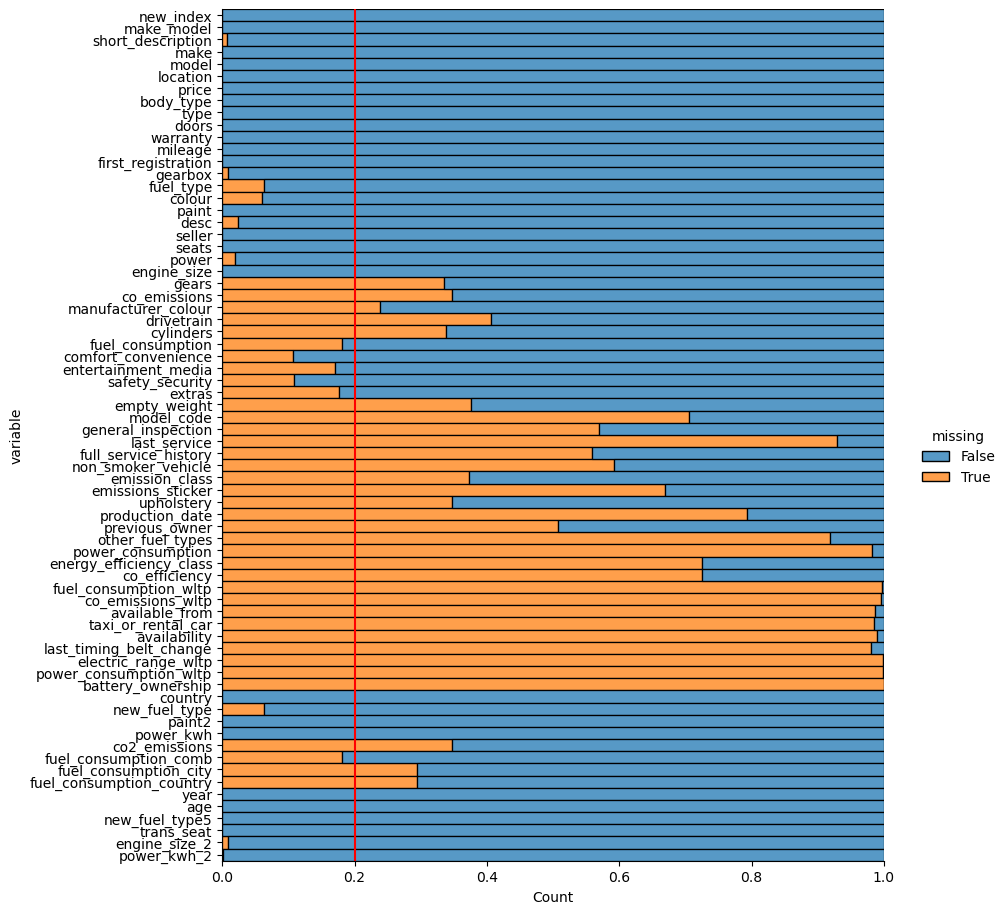

In [140]:
show_nulls(df);

In [141]:
df.drop(columns=["engine_size_2", "trans_seat", "power_kwh_2"], axis=1, inplace=True)

In [142]:
df["gears"].value_counts(dropna=False)

NaN     9516
6.0     8400
5.0     5330
7.0     1738
8.0     1688
1.0      712
9.0      642
4.0      254
10.0     111
0.0       31
3.0       24
2.0        2
Name: gears, dtype: int64

In [143]:
df.groupby(["make_model","gearbox"])["gears"].agg([pd.Series.mode, "median"]).T #drop at the end

make_model    Dacia         Dacia Dokker Dacia Duster        Dacia Jogger  \
gearbox    Automatic Manual       Manual    Automatic Manual       Manual   
mode             1.0    4.0          5.0          6.0    6.0          6.0   
median           1.0    4.0          5.0          6.0    6.0          6.0   

make_model Dacia Lodgy Dacia Logan                       Dacia Sandero         \
gearbox         Manual   Automatic Manual Semi-automatic     Automatic Manual   
mode               6.0         5.0    5.0            6.0           5.0    5.0   
median             6.0         5.0    5.0            6.0           5.0    5.0   

make_model Dacia Spring            Fiat         Fiat 124 Coupè  \
gearbox       Automatic Manual Automatic Manual         Manual   
mode                1.0     []       1.0    4.0            5.0   
median              1.0    NaN       1.0    4.0            5.0   

make_model Fiat 124 Spider        Fiat 126 Fiat 127 Fiat 128  Fiat 130         \
gearbox          Automatic Manual   Manual   Manual   Manual Automatic Manual   
mode                   6.0    6.0      4.0      4.0      4.0        []    5.0   
median                 6.0    6.0      4.0      4.0      4.0       NaN    5.0   

make_model Fiat 131  Fiat 500        Fiat 500 Abarth                        \
gearbox      Manual Automatic Manual       Automatic Manual Semi-automatic   
mode            5.0       1.0    5.0             5.0    5.0            5.0   
median          5.0       5.0    5.0             5.0    5.0            5.0   

make_model Fiat 500C        Fiat 500L                       Fiat 500X         \
gearbox    Automatic Manual Automatic Manual Semi-automatic Automatic Manual   
mode             5.0    5.0       5.0    6.0            5.0       9.0    6.0   
median           5.0    5.0       5.0    6.0            5.0       7.0    6.0   

make_model Fiat 500e        Fiat 595 Abarth        Fiat 600 Fiat 850  \
gearbox    Automatic Manual       Automatic Manual   Manual   Manual   
mode             1.0    1.0              []    5.0      4.0      4.0   
median           1.0    1.0             NaN    5.0      4.0      4.0   

make_model Fiat Barchetta Fiat Brava Fiat Bravo        Fiat Coupe Fiat Croma  \
gearbox            Manual     Manual  Automatic Manual     Manual     Manual   
mode                  5.0        5.0        4.0    5.0        5.0        6.0   
median                5.0        5.0        4.0    5.0        5.0        6.0   

make_model Fiat Dino Fiat Doblo Fiat Freemont        Fiat Fullback         \
gearbox       Manual     Manual     Automatic Manual     Automatic Manual   
mode             5.0        6.0           6.0    6.0           6.0    6.0   
median           5.0        6.0           6.0    6.0           6.0    6.0   

make_model Fiat Grande Punto Fiat New Panda Fiat Panda        Fiat Punto  \
gearbox               Manual         Manual  Automatic Manual     Manual   
mode                     5.0            6.0        5.0    5.0        5.0   
median                   5.0            6.0        5.0    5.0        5.0   

make_model Fiat Punto Evo Fiat Qubo Fiat Ritmo Fiat Sedici Fiat Seicento  \
gearbox            Manual    Manual     Manual      Manual        Manual   
mode                  5.0       5.0        5.0         5.0           5.0   
median                5.0       5.0        5.0         5.0           5.0   

make_model Fiat Stilo Fiat Strada                Fiat Talento Fiat Tipo  \
gearbox        Manual      Manual Semi-automatic       Manual Automatic   
mode              5.0          []            5.0          6.0       6.0   
median            5.0         NaN            5.0          6.0       6.0   

make_model                       Fiat Uno Fiat X 1/9     Ford          \
gearbox    Manual Semi-automatic   Manual     Manual Automatic Manual   
mode          6.0            7.0      5.0        5.0       3.0    5.0   
median        6.0            7.0      5.0        5.0       3.0    5.0   

make_model Ford B-M

In [144]:
df["co_emissions"].value_counts(dropna=False)

NaN                  9868
0 g/km (comb.)       1034
119 g/km (comb.)      393
124 g/km (comb.)      340
129 g/km (comb.)      319
                     ... 
7 g/km (comb.)          1
80 g/km (comb.)         1
196  g/km (comb.)       1
100  g/km (comb.)       1
53 g/km (comb.)         1
Name: co_emissions, Length: 348, dtype: int64

In [145]:
df["co_emissions"]

0                     NaN
1          0 g/km (comb.)
2                     NaN
3                     NaN
4                     NaN
               ...       
28625                 NaN
28626    217 g/km (comb.)
28627     99 g/km (comb.)
28628    149 g/km (comb.)
28629    251 g/km (comb.)
Name: co_emissions, Length: 28448, dtype: object

In [146]:
df["co_emissions"].isnull().sum()

9868

In [147]:
df["co_emissions_2"] = df["co_emissions"].str.extract("(\d{1,4} )g")
df["co_emissions_2"].value_counts(dropna=False)

NaN     9886
0       1034
119      393
124      340
129      319
        ... 
317        1
13         1
70         1
342        1
53         1
Name: co_emissions_2, Length: 332, dtype: int64

In [148]:
df["co_emissions_2"] = df["co_emissions_2"].astype(float)

In [149]:
df.loc[df["co_emissions_2"] == 0 , "new_fuel_type5"].value_counts()

Benzine     578
Electric    239
Diesel      148
Hybrid       65
LPG/CNG       6
Name: new_fuel_type5, dtype: int64

In [150]:
df["co_emissions_2"].replace(0, np.nan, inplace=True)

In [151]:
df["co_emissions_2"].value_counts(dropna=False)

NaN      10922
119.0      393
124.0      340
129.0      319
114.0      313
         ...  
343.0        1
73.0         1
410.0        1
70.0         1
53.0         1
Name: co_emissions_2, Length: 330, dtype: int64

In [152]:
df.groupby(["make_model","new_fuel_type5"])["co_emissions_2"].agg([pd.Series.mode, "median"]).T

make_model      Dacia           Dacia Dokker                Dacia Duster  \
new_fuel_type5 Benzine Electric      Benzine Diesel LPG/CNG      Benzine   
mode             130.0       []        143.0  108.0   143.0        138.0   
median           130.0      NaN        143.0  110.5   143.0        141.0   

make_model                    Dacia Jogger         Dacia Lodgy         \
new_fuel_type5 Diesel LPG/CNG      Benzine LPG/CNG     Benzine Diesel   
mode            115.0   132.0        138.0   120.0       139.0  105.0   
median          116.0   132.0        138.0   120.0       139.0  105.0   

make_model                            Dacia Logan                 \
new_fuel_type5                LPG/CNG     Benzine Diesel LPG/CNG   
mode            [139.0, 161.0, 168.0]       120.0   90.0   109.0   
median                          161.0       120.0  100.5   120.0   

make_model     Dacia Sandero                Dacia Spring  \
new_fuel_type5       Benzine Diesel LPG/CNG     Electric   
mode                   119.0  105.0   119.0           []   
median                 117.0  103.0   119.0          NaN   

make_model                                    Fiat                   \
new_fuel_type5                              Benzine Diesel Electric   
mode            [123.0, 148.0, 152.0, 153.0, 200.0]  107.0       []   
median                                        152.0  107.0      NaN   

make_model     Fiat 124 Coupè Fiat 124 Spider Fiat 126 Fiat 127 Fiat 128  \
new_fuel_type5        Benzine         Benzine  Benzine  Benzine  Benzine   
mode                       []           148.0       []       []       []   
median                    NaN           148.0      NaN      NaN      NaN   

make_model     Fiat 130 Fiat 131 Fiat 500                                \
new_fuel_type5  Benzine  Benzine  Benzine        Diesel Electric Hybrid   
mode                 []       []     88.0  [89.0, 95.0]     93.0   88.0   
median              NaN      NaN    115.0          95.0     99.5   88.0   

make_model             Fiat 500 Abarth Fiat 500C                         \
new_fuel_type5 LPG/CNG         Benzine   Benzine Diesel Electric Hybrid   
mode             129.0           139.0     115.0   89.0    109.0   88.0   
median           122.0           139.0     113.0   92.0    109.0   93.0   

make_model             Fiat 500L        Fiat 500X                \
new_fuel_type5 LPG/CNG   Benzine Diesel   Benzine Diesel Hybrid   
mode             124.0     144.0  109.0     133.0  107.0  133.0   
median           124.0     144.0  110.0     138.0  109.0  133.0   

make_model                                          Fiat 500e Fiat 595 Abarth  \
new_fuel_type5                              LPG/CNG  Electric         Benzine   
mode            [130.0, 145.0, 147.0, 154.0, 157.0]        []  [139.0, 159.0]   
median                                        147.0       NaN           159.0   

make_model     Fiat 600 Fiat 850 Fiat Barchetta         Fiat Brava  \
new_fuel_type5  Benzine  Benzine        Benzine LPG/CNG    Benzine   
mode               10.0       []          198.0      []         []   
median             10.0      NaN          189.5     NaN        NaN   

make_model          Fiat Bravo             Fiat Coupe         Fiat Croma  \
new_fuel_type5         Benzine Diesel         Benzine LPG/CNG     Diesel   
mode            [198.0, 246.0]  129.0  [205.0, 232.0]      []      157.0   
median                   222.0  129.0           232.0     NaN      157.0   

make_model     Fiat Dino Fiat Doblo Fiat Freemont   Fiat Fullback  \
new_fuel_type5   Benzine     Diesel        Diesel          Diesel   
mode                  []      143.0         194.0  [180.0, 196.0]   
median               NaN      143.0         194.0           180.0   

make_model     Fiat Grande Punto                 Fiat New Panda                \
new_fuel_type5           Benzine         Diesel         Benzine Diesel Hybrid   
mode              [139.0, 145.0]  [95.0, 154.0]  [116.0, 131.0]   94.0   89.0

In [153]:
df["trans_co_emissions_2"] = df.groupby(["make_model","new_fuel_type5"])["co_emissions_2"].transform(lambda x : x.median())
df["trans_co_emissions_2"].value_counts(dropna=False)

NaN      1127
273.0     778
119.0     774
114.0     738
123.0     697
         ... 
240.0       1
317.0       1
327.0       1
54.0        1
279.0       1
Name: trans_co_emissions_2, Length: 293, dtype: int64

In [154]:
df["co_emissions_2"] = df["co_emissions_2"].fillna(df["trans_co_emissions_2"])
df["co_emissions_2"].value_counts(dropna=False)  #we can drop this from the final df

NaN      1127
117.0     624
119.0     610
115.0     609
94.0      608
         ... 
342.0       1
398.0       1
316.0       1
390.0       1
248.5       1
Name: co_emissions_2, Length: 391, dtype: int64

In [275]:
df["co_emissions_2"].fillna(df["co_emissions_2"].mean(), inplace = True)

In [276]:
df["co_emissions_2"].value_counts(dropna=False)

138.857637    1127
117.000000     624
119.000000     610
115.000000     609
94.000000      608
              ... 
342.000000       1
398.000000       1
316.000000       1
390.000000       1
248.500000       1
Name: co_emissions_2, Length: 391, dtype: int64

In [155]:
df["drivetrain"].value_counts(dropna=False) #check before dropping

Front    12065
NaN      11564
4WD       3250
Rear      1569
Name: drivetrain, dtype: int64

In [156]:
df["cylinders"].value_counts(dropna=False)  

4.0     13061
NaN      9605
3.0      3258
6.0      1012
5.0       799
8.0       538
2.0       103
0.0        35
1.0        21
12.0        8
7.0         6
26.0        1
16.0        1
Name: cylinders, dtype: int64

In [157]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [158]:
df['fuel_consumption_comb'].value_counts(dropna=False)

NaN                      5167
5 l/100 km (comb.)        813
4.9 l/100 km (comb.)      809
4.5 l/100 km (comb.)      689
5.1 l/100 km (comb.)      636
                         ... 
16 l/100 km (comb.)         1
6.1 kg/100 km (comb.)       1
57 l/100 km (comb.)         1
61 l/100 km (comb.)         1
0.9 kg/100 km (comb.)       1
Name: fuel_consumption_comb, Length: 148, dtype: int64

In [159]:
df['fuel_consumption_comb_kg'] = df['fuel_consumption_comb'].str.extract(r"(\d+\.?\d*) kg")

In [160]:
df.loc[ df['fuel_consumption_comb_kg'].notna(),["fuel_type", "new_fuel_type5",'fuel_consumption_comb_kg']].T

4495     4879     5030     6868     9500   \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg      7.2      4.7      4.7      6.1      8.3   

                            9817     9856     9873     9877     9887   \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg      6.6      3.1      3.1      6.3      3.1   

                                   10802    11069    11330    11342    11352  \
fuel_type                 Domestic gas L      CNG      CNG      CNG      CNG   
new_fuel_type5                   LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg               5      8.3      8.3      8.3      8.3   

                            11365    11367    11384    11385    11395  \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg      8.3      8.3      8.3      8.3      8.3   

                            11398    11408    11411    11460   11524    11817  \
fuel_type                     CNG      CNG      CNG      CNG     CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  Hybrid  LPG/CNG   
fuel_consumption_comb_kg      8.3      8.3      8.3      8.4     6.5      4.6   

                            11876    11892    11895    11897    11898  \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg        5        5        0        5        0   

                            11905    11920    11921    11924    11927  \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg        5        5      5.4        5        5   

                            11928    11929    11965    12014    12050  \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg        5        5      5.4      5.4      5.4   

                            12079    12089    12104    12109    12133  \
fuel_type                     CNG      CNG      CNG      CNG      CNG   
new_fuel_type5            LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG  LPG/CNG   
fuel_consumption_comb_kg        5        0        5        4      5.4   

                            12202    12386                  12553  \
fuel_type                     CNG      CNG  CNG (Particle filter)   
new_fuel_type5            LPG/CNG  LPG/CNG                LPG/CNG   
fuel_consumption_comb_kg      5.2      3.6                    5.2   

                                          12626    12642           12671  \
fuel_type                 CNG (Particle filter)      CNG  Domestic gas H   
new_fuel_type5                          LPG/CNG  LPG/CNG         LPG/CNG   
fuel_consumption_comb_kg                    5.2        0             3.5   

                                   12703           12731           12732  \
fuel_type                 Domestic gas H  Domestic gas H  Domestic gas H   
new_fuel_type5                   LPG/CNG         LPG/CNG         LPG/CNG   
fuel_consumption_comb_kg             3.4             3.5             3.5   

                                   12738           12749  \
fuel_type                 Domestic gas H  Domestic gas L   
new_fuel_type5                   LPG/CNG         LPG/CNG   
fuel_consumption_comb_kg             3.5             3.4   

                                                     12753           12755  \
fuel_type                 Domestic gas L (Particle filter)  Domestic gas H   
new_fuel_type5                                 

In [161]:
df['fuel_consumption_comb_kg'] = df['fuel_consumption_comb_kg'].astype(float)

In [162]:
df['fuel_consumption_comb_kg'] =  (df['fuel_consumption_comb_kg'] * 0.742)

In [163]:
df["fuel_consumption_comb_new"] = df["fuel_consumption_comb"].str.extract(r"(\d+\.?\d*)")

In [164]:
df.loc[df['fuel_consumption_comb_kg'].notna(), "fuel_consumption_comb_new"] = df.loc[df['fuel_consumption_comb_kg'].notna(), 'fuel_consumption_comb_kg']

In [165]:
df["fuel_consumption_comb_new"].value_counts(dropna=False)

NaN                   5167
5                      813
4.9                    809
4.5                    689
5.1                    636
                      ... 
16                       1
4.526199999999999        1
57                       1
61                       1
0.6678000000000001       1
Name: fuel_consumption_comb_new, Length: 148, dtype: int64

In [166]:
df["fuel_consumption_comb_new"] = df["fuel_consumption_comb_new"].astype(float)

In [167]:
df["fuel_consumption_comb_new"].sort_values(ascending=True)

4747     0.0
20201    0.0
534      0.0
20207    0.0
20228    0.0
        ... 
28608    NaN
28609    NaN
28610    NaN
28614    NaN
28615    NaN
Name: fuel_consumption_comb_new, Length: 28448, dtype: float64

In [168]:
df.groupby(["make_model", "body_type","gearbox", "new_fuel_type5","engine_size"])["fuel_consumption_comb_new"].agg(["mean", "min", "max", "median"]).T

make_model        Dacia                            Dacia Dokker          \
body_type        Compact   Sedan Station wagon Off-Road/Pick-up           
gearbox        Automatic  Manual        Manual           Manual           
new_fuel_type5  Electric Benzine       Benzine          Benzine LPG/CNG   
engine_size      0.0     1289.0        999.0            1598.0  1598.0    
mean                 NaN     NaN           5.6              6.3     6.3   
min                  NaN     NaN           5.6              6.3     6.3   
max                  NaN     NaN           5.6              6.3     6.3   
median               NaN     NaN           5.6              6.3     6.3   

make_model                                                              \
body_type        Sedan Station wagon                                     
gearbox         Manual        Manual                                     
new_fuel_type5  Diesel       Benzine                            Diesel   
engine_size    1598.0        1197.0  1332.0  1333.0    1598.0  999.0     
mean               NaN         6.075    6.05     6.2  6.288889     4.5   
min                NaN         5.700    6.00     6.2  5.700000     4.5   
max                NaN         6.700    6.10     6.2  6.800000     4.5   
median             NaN         5.950    6.05     6.2  6.200000     4.5   

make_model                                            Dacia Duster          \
body_type                                         Off-Road/Pick-up           
gearbox                                                  Automatic           
new_fuel_type5                    LPG/CNG                  Benzine           
engine_size      1461.0  1500.0   1598.0  16597.0          1332.0  1333.0    
mean            4.266667    4.38  6.57044     NaN         5.933333     NaN   
min             4.100000    4.20  5.70000     NaN         5.400000     NaN   
max             4.500000    5.00  7.20000     NaN         6.200000     NaN   
median          4.200000    4.30  6.75220     NaN         6.200000     NaN   

make_model                                                                \
body_type                                                                  
gearbox                 Manual                                             
new_fuel_type5  Diesel Benzine                                             
engine_size    1461.0  332.0   999.0     1197.0  1198.0  1199.0  1200.0    
mean               4.5     NaN     5.5  6.246154     NaN     6.1     6.1   
min                4.4     NaN     5.0  6.100000     NaN     6.0     6.1   
max                4.7     NaN     7.1  6.400000     NaN     6.3     6.1   
median             4.5     NaN     5.1  6.200000     NaN     6.0     6.1   

make_model                                                                \
body_type                                                                  
gearbox                                                                    
new_fuel_type5                                                             
engine_size    1300.0  1330.0  1332.0    1333.0  1589.0  1598.0  1600.0    
mean               6.1     5.9   5.944  2.016667     6.1    6.96     7.1   
min                6.1     5.8   5.700  0.000000     6.1    6.20     7.1   
max                6.1     6.1   6.400  6.100000     6.1    8.40     7.1   
median             6.1     5.8   6.000  0.000000     6.1    6.80     7.1   

make_model                                                              \
body_type                                                        Sedan   
gearbox                                                      Automatic   
new_fuel_type5    Diesel           LPG/CNG                      Diesel   
engine_size      1461.0  1500.0    999.0   1197.0    1598.0    1461.0    
mean            4.288991     NaN  5.654545     6.2  8.042857       NaN   
min             0.000000     NaN  5.000000     6.2  6.900000       NaN   
max             5.300000     NaN  5.800000     6.2  9.100000      

In [169]:
df["fuel_consumption_comb_new_2"] = df.groupby(["make_model", "body_type","gearbox", "new_fuel_type5","engine_size"])["fuel_consumption_comb_new"].transform(lambda x : x.mean())
df["fuel_consumption_comb_new_2"].value_counts(dropna=False)

NaN         2086
3.513531     310
5.000000     286
4.800000     173
6.000000     172
            ... 
3.932600       1
2.597000       1
2.968000       1
3.100000       1
4.303600       1
Name: fuel_consumption_comb_new_2, Length: 1242, dtype: int64

In [170]:
df.loc[df["fuel_consumption_comb_new_2"].isna(), ["new_fuel_type5" ,"power_kwh", "fuel_consumption_comb_new_2"]].value_counts(dropna=False)

new_fuel_type5  power_kwh  fuel_consumption_comb_new_2
Electric        100.0      NaN                            84
                87.0       NaN                            52
                80.0       NaN                            43
Benzine         66.0       NaN                            39
                103.0      NaN                            38
                                                          ..
Electric        13.0       NaN                             1
                17.0       NaN                             1
Benzine         218.0      NaN                             1
Electric        19.0       NaN                             1
Benzine         570.0      NaN                             1
Length: 431, dtype: int64

In [171]:
df[(df["fuel_consumption_comb_new_2"].isna()) & (df["new_fuel_type5"] == "Electric" ) ]

new_index             make_model  \
1              1  Mercedes-Benz EQE 350   
93            93      Mercedes-Benz EQS   
94            94      Mercedes-Benz EQS   
108          108      Mercedes-Benz EQS   
931          931  Mercedes-Benz CLA 250   
...          ...                    ...   
27281      28079                 Volvo    
28340      29169              Volvo S90   
28449      29281             Volvo XC60   
28452      29284             Volvo XC60   
28528      29369              Volvo S90   

                                       short_description           make  \
1                                                   350+  Mercedes-Benz   
93     580 4MATIC AMG Line Premium plus | Rij-assist + |  Mercedes-Benz   
94                                  450+ AMG Line 108kWh  Mercedes-Benz   
108                      350 AMG Line 90kWh Premium Pack  Mercedes-Benz   
931                                     e AMG Line+Pano+  Mercedes-Benz   
...                                                  ...            ...   
27281        1st Edition AWD Recharge Pure Electric Twin          Volvo   
28340                   2.0 T8 BUSINESS PLUS 4WD AUTO 4P          Volvo   
28449                   T6 Recharge R Design PANO/GOOGLE          Volvo   
28452                  T6  Recharge R Design PANO/GOOGLE          Volvo   
28528                   2.0 T8 BUSINESS PLUS 4WD AUTO 4P          Volvo   

                 model                                           location  \
1      \n, EQE 350 ,\n       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
93         \n, EQS ,\n            St. Eustatius 2,  7333 NX APELDOORN, NL   
94         \n, EQS ,\n              Marhulzenweg 26,  7141 CS GROENLO, NL   
108        \n, EQS ,\n              Marhulzenweg 26,  7141 CS GROENLO, NL   
931    \n, CLA 250 ,\n             Arenberger Str. 54,  56077 Koblenz, DE   
...                ...                                                ...   
27281         \n,  ,\n  Roermonder Str. 187 - 189,  52531 Übach-Palenb...   
28340      \n, S90 ,\n    C/ FRANCISCO ARITIO, 41,  19004 GUADALAJARA, ES   
28449     \n, XC60 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28452     \n, XC60 ,\n      Generaal de wittelaan 7 B,  2800 Mechelen, BE   
28528      \n, S90 ,\n  VÍA COMPLUTENSE, 121,  28805 ALCALÁ DE HENARES...   

        price         body_type            type doors  warranty  mileage  \
1       80900           Compact  Pre-registered   4.0         2   5000.0   
93     168444           Compact  Pre-registered   5.0         0     10.0   
94     122500           Compact  Pre-registered   5.0         1   5712.0   
108    117500           Compact            Used   5.0         1   3808.0   
931     47990             Coupe            Used   4.0         1  15000.0   
...       ...               ...             ...   ...       ...      ...   
27281   65400  Off-Road/Pick-up   Demonstration   5.0         0   2242.0   
28340   51900             Sedan            Used   4.0         2   5087.0   
28449   68900             Sedan            Used   5.0         2  11298.0   
28452   68900             Sedan            Used   5.0         1   3012.0   
28528   51900             Sedan            Used   4.0         2   5087.0   

      first_registration    gearbox fuel_type  colour  paint  \
1             2022-01-06  Automatic  Electric     NaN      0   
93            2022-01-07  Automatic       NaN   Black      0   
94            2022-01-02  Automatic       NaN   Black      1   
108           2022-01-05  Automatic       NaN    Blue      1   
931           2021-01-08        NaN       NaN   White      1   
...                  ...        ...       ...     ...    ...   
27281         2021-01-12  Automatic       NaN  Silver      1   
28340         2021-01-08  Automatic  Electric     NaN      0   
28449         2021-01-12  Automatic       NaN    Grey      1   
28452         2021-01-11  Automatic       NaN   Black      1   
28528         2021-01-08  Automatic  Electric  

In [172]:
df["fuel_consumption_comb_new_2"].fillna(df["fuel_consumption_comb_new_2"].mean())

0        3.800000
1        5.204747
2        7.540385
3        6.665000
4        4.900000
           ...   
28625    1.987500
28626    9.100000
28627    4.100000
28628    6.757143
28629    0.400000
Name: fuel_consumption_comb_new_2, Length: 28448, dtype: float64

In [173]:
df["fuel_consumption_comb_new_3"] = df["fuel_consumption_comb_new_2"].fillna(df["fuel_consumption_comb_new_2"].mean())

In [174]:
df["fuel_consumption_comb_new_2"].describe().T

count    26362.000000
mean         5.204747
std          1.836243
min          0.000000
25%          4.130435
50%          5.000000
75%          6.234146
max         39.340000
Name: fuel_consumption_comb_new_2, dtype: float64

In [175]:
df["fuel_consumption_comb_new_3"].describe().T

count    28448.000000
mean         5.204747
std          1.767636
min          0.000000
25%          4.200000
50%          5.121053
75%          6.116667
max         39.340000
Name: fuel_consumption_comb_new_3, dtype: float64

In [176]:
df["fuel_consumption_comb_new_3"].value_counts(dropna=False)

5.204747    2086
3.513531     310
5.000000     286
4.800000     173
6.000000     172
            ... 
3.932600       1
2.597000       1
2.968000       1
3.100000       1
4.303600       1
Name: fuel_consumption_comb_new_3, Length: 1242, dtype: int64

In [271]:
df["fuel_consumption_comb_new_3"].isna().sum()

0

### Safety Security

In [177]:
df["safety_security_count"] = df['safety_security'].str.count(',') + 1

In [178]:
df.loc[df["safety_security"].isna(),"safety_security_count" ]=0

In [179]:
df["safety_security_count"].value_counts(dropna=False)

0.0     3075
9.0     1705
8.0     1368
10.0    1310
13.0    1274
11.0    1273
14.0    1236
12.0    1226
15.0    1176
7.0     1140
16.0    1111
18.0     972
17.0     926
19.0     906
22.0     904
21.0     867
6.0      846
23.0     840
24.0     826
20.0     802
25.0     733
26.0     686
1.0      660
4.0      463
5.0      419
3.0      400
27.0     372
2.0      258
28.0     247
29.0     154
30.0     153
31.0      60
32.0      27
34.0      18
33.0      12
35.0       2
36.0       1
Name: safety_security_count, dtype: int64

In [180]:
# # Perform clustering based on the feature count
# # Extract the feature count column as the input for clustering


# X = df[['safety_security_count']]

# # Define the number of clusters you want
# kmeans = KMeans(n_clusters=3)
# df['cluster_safety'] = kmeans.fit_predict(X)

C:\Users\Adel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [181]:
df.groupby("cluster_safety")["safety_security_count"].agg(["count", "mean",pd.Series.mode, "min", "max"])

count       mean  mode   min   max
cluster_safety                                    
0                7261   2.668916   0.0   0.0   7.0
1               12605  12.148195   9.0   8.0  17.0
2                8582  22.605919  18.0  18.0  36.0

In [250]:
df["safety_security_kmeans"] = df["cluster_safety"].map({0:"Low", 1:"Medium", 2:"High"})


In [251]:
df["safety_security_kmeans"].value_counts(dropna=False)

Medium    12605
High       8582
Low        7261
Name: safety_security_kmeans, dtype: int64

### Comfort Convenience

In [184]:
df["comfort_convenience_count"] = df['comfort_convenience'].str.count(',') + 1

In [185]:
df.loc[df["comfort_convenience"].isna(),"comfort_convenience_count" ] = 0

In [186]:
df["comfort_convenience_count"].value_counts(dropna=False)

0.0     3057
5.0     1429
6.0     1356
3.0     1218
7.0     1188
4.0     1106
17.0    1099
15.0    1081
8.0     1068
16.0    1062
18.0    1056
19.0    1052
14.0    1052
20.0    1050
10.0    1022
11.0     984
12.0     979
13.0     920
21.0     880
9.0      872
22.0     831
2.0      759
23.0     730
24.0     649
1.0      579
25.0     428
26.0     347
27.0     200
28.0     150
29.0     118
30.0      62
31.0      34
32.0      15
33.0      12
34.0       3
Name: comfort_convenience_count, dtype: int64

In [187]:
# X = df[['comfort_convenience_count']]

# #Define the number of clusters you want
# kmeans = KMeans(n_clusters=3)
# df['cluster_comfort'] = kmeans.fit_predict(X)

C:\Users\Adel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [188]:
df.groupby("cluster_comfort")["comfort_convenience_count"].agg(["count", "mean",pd.Series.mode, "min", "max"])

count       mean  mode   min   max
cluster_comfort                                    
0                11760   3.598299   0.0   0.0   8.0
1                 7617  21.761848  18.0  18.0  34.0
2                 9071  13.142763  17.0   9.0  17.0

In [252]:
df["comfort_convenience_kmeans"] = df["cluster_comfort"].map({0:"Low", 1:"High", 2:"Medium"})


In [253]:
df["comfort_convenience_kmeans"].value_counts(dropna=False)

Low       11760
Medium     9071
High       7617
Name: comfort_convenience_kmeans, dtype: int64

### Entertainment_Media

In [191]:
df["entertainment_media_count"] = df['entertainment_media'].str.count(',') + 1

In [192]:
df.loc[df["entertainment_media"].isna(),"entertainment_media_count" ]=0

In [193]:
df["entertainment_media_count"].value_counts(dropna=False)

0.0     4852
2.0     2550
3.0     2441
4.0     2238
1.0     2130
7.0     2105
8.0     2056
6.0     2034
5.0     2018
9.0     1799
10.0    1602
11.0    1196
12.0     840
13.0     448
14.0     115
15.0      20
16.0       4
Name: entertainment_media_count, dtype: int64

In [194]:
# X = df[['entertainment_media_count']]

# #Define the number of clusters you want
# kmeans = KMeans(n_clusters=3)
# df['cluster_entertainment'] = kmeans.fit_predict(X)

C:\Users\Adel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [195]:
df.groupby("cluster_entertainment")["entertainment_media_count"].agg(["count", "mean",pd.Series.mode, "min", "max"])

count      mean  mode  min   max
cluster_entertainment                                  
0                       8080  9.862995   8.0  8.0  16.0
1                      11973  1.215485   0.0  0.0   3.0
2                       8395  5.477189   4.0  4.0   7.0

In [254]:
df["entertainment_kmeans"] = df["cluster_entertainment"].map({2:"Medium", 0:"High", 1:"Low"})


In [255]:
df["entertainment_kmeans"].value_counts(dropna=False)

Low       11973
Medium     8395
High       8080
Name: entertainment_kmeans, dtype: int64

### Extras

In [198]:
df["extras_count"] = df['extras'].str.count(',') + 1

In [199]:
 df.loc[df["extras"].isna(),"extras_count" ]=0

In [200]:
df["extras_count"].value_counts(dropna=False)

0.0     4999
1.0     4864
2.0     3098
3.0     2794
4.0     2311
5.0     2021
6.0     1596
7.0     1493
8.0     1135
9.0      997
10.0     880
11.0     650
12.0     565
13.0     378
14.0     271
15.0     191
16.0     108
17.0      55
18.0      27
19.0      10
20.0       3
26.0       2
Name: extras_count, dtype: int64

In [201]:
#  X = df[['extras_count']]

# # Define the number of clusters you want
# kmeans = KMeans(n_clusters=3)
# df['cluster_extras'] = kmeans.fit_predict(X)

C:\Users\Adel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [202]:
df.groupby("cluster_extras")["extras_count"].agg(["count", "mean",pd.Series.mode, "min", "max"])

count       mean  mode  min   max
cluster_extras                                   
0                8556   5.663394   4.0  4.0   8.0
1               15755   1.234021   0.0  0.0   3.0
2                4137  11.294900   9.0  9.0  26.0

In [256]:
df["extras_kmeans"] = df["cluster_extras"].map({0:"Medium", 1:"Low", 2:"High"})


In [257]:
df["extras_kmeans"].value_counts(dropna=False)


Low       15755
Medium     8556
High       4137
Name: extras_kmeans, dtype: int64

<Figure size 1000x500 with 0 Axes>

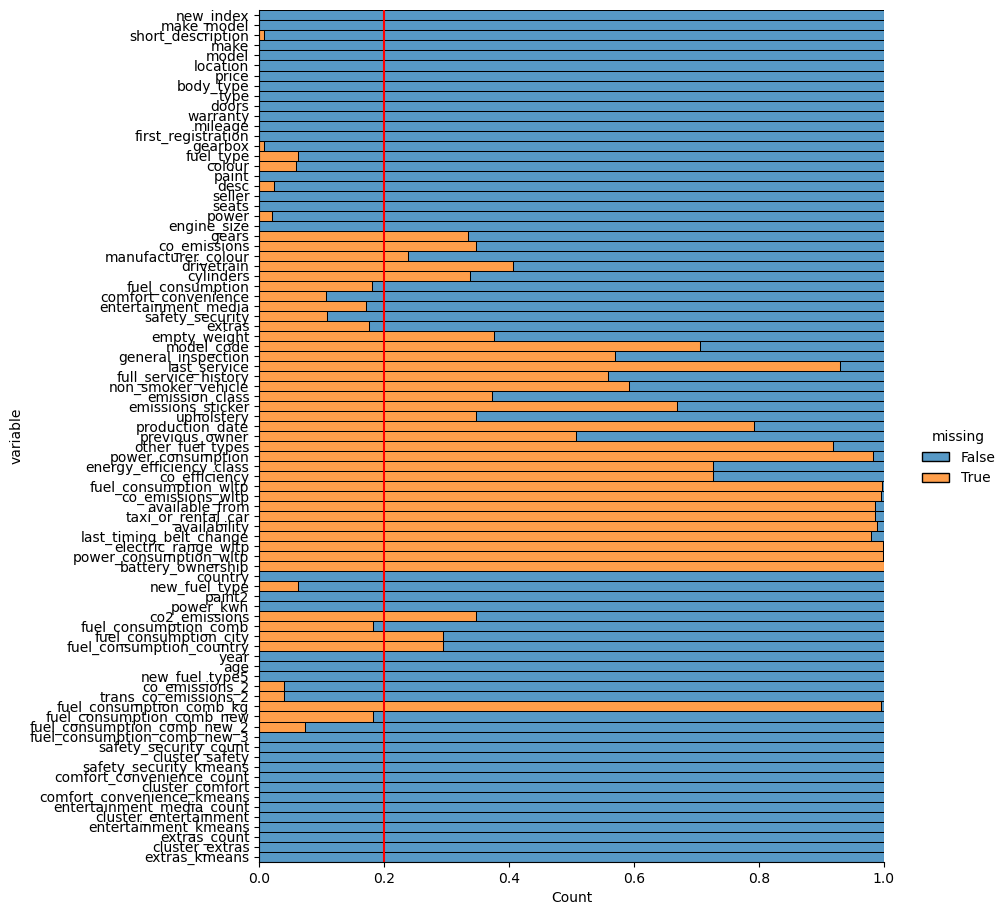

In [205]:
show_nulls(df);

In [206]:
df["empty_weight"].value_counts(dropna=False)

NaN       10692
1395.0      233
1055.0      224
1423.0      216
1165.0      200
          ...  
1877.0        1
1011.0        1
1069.0        1
983.0         1
1391.0        1
Name: empty_weight, Length: 1219, dtype: int64

In [207]:
df.groupby(["make_model", "body_type"])["empty_weight"].agg([pd.Series.mode, "median", "mean"]).T

make_model  Dacia                           Dacia Dokker                      \
body_type  Compact  Sedan Station wagon Off-Road/Pick-up Sedan Station wagon   
mode        1045.0  935.0            []               []    []        1280.0   
median      1045.0  935.0           NaN              NaN   NaN        1278.5   
mean        1045.0  935.0           NaN              NaN   NaN   1265.166667   

make_model     Dacia Duster          \
body_type  Off-Road/Pick-up   Sedan   
mode                 1320.0  1305.0   
median               1305.0  1305.0   
mean            1307.372263  1305.0   

make_model                                                     \
body_type                                       Station wagon   
mode        [1160.0, 1177.0, 1205.0, 1271.0, 1309.0, 1349....   
median                                                 1271.0   
mean                                              1266.571429   

make_model     Dacia Jogger                                 Dacia Lodgy  \
body_type  Off-Road/Pick-up             Station wagon             Sedan   
mode                     []  [1233.0, 1251.0, 1262.0]  [1303.0, 1395.0]   
median                  NaN                    1262.0            1349.0   
mean                    NaN               1266.545455            1349.0   

make_model               Dacia Logan                            Dacia Sandero  \
body_type  Station wagon     Compact        Sedan Station wagon       Compact   
mode              1280.0       974.0       1050.0        1165.0        1040.0   
median            1280.0       974.0       1050.0        1165.0        1040.0   
mean              1294.6      1011.0  1048.166667   1157.157895   1037.961538   

make_model                                                               \
body_type                   Off-Road/Pick-up        Sedan Station wagon   
mode        [1139.0, 1165.0, 1176.0, 1192.0]       1115.0            []   
median                                1170.5       1134.0           NaN   
mean                                  1168.0  1122.014925           NaN   

make_model Dacia Spring                                 Fiat               \
body_type       Compact Off-Road/Pick-up        Sedan Compact Convertible   
mode             1045.0           1045.0       1012.0  1365.0          []   
median           1045.0           1045.0       1012.0  1365.0         NaN   
mean        1038.730769           1045.0  1014.666667  1365.0         NaN   

make_model                                                                    \
body_type                                    Coupe   Sedan     Station wagon   
mode        [720.0, 950.0, 1000.0, 1285.0, 1290.0]  1225.0  [1180.0, 1200.0]   
median                                      1000.0  1225.0            1190.0   
mean                                        1049.0  1225.0            1190.0   

make_model Fiat 124 Coupè Fiat 124 Spider              Fiat 126                \
body_type           Coupe     Convertible        Coupe  Compact  Coupe  Sedan   
mode                   []          1125.0       1050.0       []  600.0  670.0   
median                NaN          1125.0       1050.0      NaN  600.0  670.0   
mean                  NaN     1108.548387  1059.210526      NaN  600.0  670.0   

make_model Fiat 127 Fiat 128       Fiat 130 Fiat 131    Fiat 500              \
body_type     Coupe    Coupe Sedan    Coupe    Coupe     Compact Convertible   
mode         1100.0    860.0    []   1600.0       []      1055.0       980.0   
median       1100.0    860.0   NaN   1600.0      NaN       960.0       980.0   
mean         1100.0    860.0   NaN   1600.0      NaN  969.993421  965.185185   

make_model                                                               \
body_type                            Coupe Off-Road/Pick-up       Sedan   
mode        [865.0, 980.0, 1055.0, 1365.0]           1395.0       960.0   
median                               980.0           1395.0       960.0   
mean                     

In [208]:
df["empty_weight_2"] = df.groupby(["make_model", "body_type"])["empty_weight"].transform(lambda x : x.median())
df["empty_weight_2"].value_counts(dropna=False)

1423.0    647
1646.0    624
1388.0    524
1733.0    474
NaN       461
         ... 
1307.0      1
650.0       1
1502.0      1
2725.0      1
1493.0      1
Name: empty_weight_2, Length: 563, dtype: int64

In [209]:
df["empty_weight"] = df["empty_weight"].fillna(df["empty_weight_2"])

In [210]:
df["empty_weight"].value_counts(dropna=False)

NaN       461
1165.0    433
1055.0    318
1134.0    309
1733.0    309
         ... 
1066.0      1
2032.0      1
2042.0      1
1073.0      1
1391.0      1
Name: empty_weight, Length: 1301, dtype: int64

In [211]:
df["empty_weight"] = df["empty_weight"].fillna(df["empty_weight"].mean())

In [212]:
df["empty_weight"].value_counts(dropna=False)

1421.658663    461
1165.000000    433
1055.000000    318
1134.000000    309
1733.000000    309
              ... 
1066.000000      1
2032.000000      1
2042.000000      1
1073.000000      1
1391.000000      1
Name: empty_weight, Length: 1301, dtype: int64

In [213]:
df["empty_weight"].describe().T

count    28448.000000
mean      1421.658663
std        316.790334
min         75.000000
25%       1215.000000
50%       1388.000000
75%       1588.500000
max      15590.000000
Name: empty_weight, dtype: float64

In [272]:
df["empty_weight"].isna().sum()

0

In [214]:
df.columns


Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [215]:
df['general_inspection'].value_counts(dropna=False)

NaN           16201
01/06/2022     5922
01/05/2023      286
01/08/2023      280
01/03/2023      268
              ...  
01/07/2017        1
01/08/2013        1
01/08/2020        1
01/08/2018        1
01/03/2021        1
Name: general_inspection, Length: 91, dtype: int64

In [216]:
df['general_inspection'].sort_values(ascending=True)

10436    01/01/2018
24076    01/01/2020
10928    01/01/2021
5941     01/01/2021
17434    01/01/2021
            ...    
28621           NaN
28622           NaN
28624           NaN
28625           NaN
28627           NaN
Name: general_inspection, Length: 28448, dtype: object

In [217]:
df['general_inspection'] = pd.to_datetime(df['general_inspection'])

In [218]:
df['general_inspection'].info()

<class 'pandas.core.series.Series'>
Int64Index: 28448 entries, 0 to 28629
Series name: general_inspection
Non-Null Count  Dtype         
--------------  -----         
12247 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [219]:
df['general_inspection_2'] = df['general_inspection'].apply(lambda x : 0 if pd.isnull(x) else 1 if x <= pd.Timestamp(2022, 6, 1)  else 2 )
df['general_inspection_2'].value_counts(dropna=False)

0    16201
1     6706
2     5541
Name: general_inspection_2, dtype: int64

In [273]:
df['general_inspection_2'].isna().sum()

0

In [220]:
df["full_service_history"].value_counts(dropna=False)

NaN    15897
Yes    12551
Name: full_service_history, dtype: int64

In [221]:
df["full_service_history_2"] = df["full_service_history"].apply(lambda x : 0 if pd.isnull(x) else 1 )
df["full_service_history_2"].value_counts(dropna=False)

0    15897
1    12551
Name: full_service_history_2, dtype: int64

In [222]:
df["non_smoker_vehicle"].value_counts(dropna=False)

NaN    16865
Yes    11583
Name: non_smoker_vehicle, dtype: int64

In [223]:
df["non_smoker_vehicle"] = df["non_smoker_vehicle"].apply(lambda x : 0 if pd.isnull(x) else 1 )
df["non_smoker_vehicle"].value_counts(dropna=False)

0    16865
1    11583
Name: non_smoker_vehicle, dtype: int64

In [224]:
df["emission_class"].value_counts(dropna=False)

Euro 6    12806
NaN       10602
Euro 5     2388
Euro 4     1743
Euro 3      522
Euro 2      217
Euro 1      170
Name: emission_class, dtype: int64

In [225]:
df["emission_class"] = df["emission_class"].astype("string")

In [226]:
df["emission_class"].info()

<class 'pandas.core.series.Series'>
Int64Index: 28448 entries, 0 to 28629
Series name: emission_class
Non-Null Count  Dtype 
--------------  ----- 
17846 non-null  string
dtypes: string(1)
memory usage: 1.4 MB


In [227]:
df.groupby(["make_model", "new_fuel_type5"])["emission_class"].agg([pd.Series.mode]).T

make_model      Dacia           Dacia Dokker                 Dacia Duster  \
new_fuel_type5 Benzine Electric      Benzine  Diesel LPG/CNG      Benzine   
mode            Euro 6   Euro 6       Euro 6  Euro 6  Euro 6       Euro 6   

make_model                     Dacia Jogger         Dacia Lodgy          \
new_fuel_type5  Diesel LPG/CNG      Benzine LPG/CNG     Benzine  Diesel   
mode            Euro 6  Euro 6       Euro 6  Euro 6      Euro 6  Euro 6   

make_model             Dacia Logan                 Dacia Sandero          \
new_fuel_type5 LPG/CNG     Benzine  Diesel LPG/CNG       Benzine  Diesel   
mode            Euro 6      Euro 6  Euro 6  Euro 6        Euro 6  Euro 5   

make_model             Dacia Spring             Fiat                    \
new_fuel_type5 LPG/CNG     Electric           Benzine  Diesel Electric   
mode            Euro 6       Euro 6  [Euro 1, Euro 6]  Euro 5   Euro 6   

make_model     Fiat 124 Coupè Fiat 124 Spider Fiat 126 Fiat 127 Fiat 128  \
new_fuel_type5        Benzine         Benzine  Benzine  Benzine  Benzine   
mode                   Euro 1          Euro 6       []       []       []   

make_model     Fiat 130 Fiat 131 Fiat 500                                   \
new_fuel_type5  Benzine  Benzine  Benzine  Diesel Electric  Hybrid LPG/CNG   
mode                 []       []   Euro 6  Euro 5   Euro 6  Euro 6  Euro 6   

make_model     Fiat 500 Abarth Fiat 500C                                     \
new_fuel_type5         Benzine   Benzine            Diesel Electric  Hybrid   
mode                    Euro 6    Euro 6  [Euro 5, Euro 6]   Euro 6  Euro 6   

make_model             Fiat 500L         Fiat 500X                         \
new_fuel_type5 LPG/CNG   Benzine  Diesel   Benzine  Diesel Hybrid LPG/CNG   
mode            Euro 6    Euro 6  Euro 6    Euro 6  Euro 6     []  Euro 6   

make_model     Fiat 500e Fiat 595 Abarth Fiat 600 Fiat 850 Fiat Barchetta  \
new_fuel_type5  Electric         Benzine  Benzine  Benzine        Benzine   
mode              Euro 6          Euro 6   Euro 1       []         Euro 2   

make_model             Fiat Brava Fiat Bravo         Fiat Coupe          \
new_fuel_type5 LPG/CNG    Benzine    Benzine  Diesel    Benzine LPG/CNG   
mode            Euro 1         []     Euro 2  Euro 4     Euro 2      []   

make_model     Fiat Croma Fiat Dino Fiat Doblo Fiat Freemont Fiat Fullback  \
new_fuel_type5     Diesel   Benzine     Diesel        Diesel        Diesel   
mode               Euro 4    Euro 5     Euro 5        Euro 5        Euro 6   

make_model     Fiat Grande Punto         Fiat New Panda                  \
new_fuel_type5           Benzine  Diesel        Benzine  Diesel  Hybrid   
mode                      Euro 4  Euro 4         Euro 6  Euro 6  Euro 6   

make_model             Fiat Panda                                  Fiat Punto  \
new_fuel_type5 LPG/CNG    Benzine  Diesel Electric  Hybrid LPG/CNG    Benzine   
mode            Euro 6     Euro 6  Euro 6   Euro 6  Euro 6  Euro 6     Euro 6   

make_model                        Fiat Punto Evo                 Fiat Qubo  \
new_fuel_type5  Diesel LPG/CNG           Benzine  Diesel LPG/CNG   Benzine   
mode            Euro 6  Euro 6  [Euro 5, Euro 6]  Euro 5  Euro 5    Euro 6   

make_model             Fiat Ritmo Fiat Sedici                 Fiat Seicento  \
new_fuel_type5  Diesel    Benzine     Benzine  Diesel LPG/CNG       Benzine   
mode            Euro 6         []      Euro 5  Euro 5  Euro 5        Euro 4   

make_model     Fiat Stilo        Fiat Strada Fiat Talento Fiat Tipo          \
new_fuel_type5    Benzine Diesel      Diesel       Diesel   Benzine  Diesel   
mode               Euro 4     []      Euro 4       Euro 6    Euro 6  Euro 6   

make_model                     Fiat Uno Fiat X 1/9   Ford            \
new_fuel_type5  Hybrid LPG/CNG  Benzine    Benzine Benzine Electric   
mode            Euro 6  Euro 6   Euro 1     Euro 1  Euro 4       []   

make_model            Ford B-Max                   Ford Bronco Ford 

In [228]:
df["emission_class_2"] = df.groupby(["make_model", "new_fuel_type5"])["emission_class"].transform(lambda x: x.mode().iat[0] if len(x.mode()) > 0 else np.nan)
df["emission_class_2"].value_counts(dropna=False)

Euro 6    22385
Euro 5     2323
Euro 4     2167
Euro 3      523
NaN         429
Euro 2      316
Euro 1      305
Name: emission_class_2, dtype: int64

In [229]:
df["emission_class_2"].fillna(df["emission_class_2"].mode().iloc[0], inplace=True)

In [230]:
df["emission_class_2"].info()

<class 'pandas.core.series.Series'>
Int64Index: 28448 entries, 0 to 28629
Series name: emission_class_2
Non-Null Count  Dtype 
--------------  ----- 
28448 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [231]:
df["emission_class_2"].value_counts(dropna=False)

Euro 6    22814
Euro 5     2323
Euro 4     2167
Euro 3      523
Euro 2      316
Euro 1      305
Name: emission_class_2, dtype: int64

In [232]:
df["upholstery"].value_counts(dropna=False)

NaN             9874
Cloth           8730
Full leather    5429
Part leather    2829
alcantara        763
Other            617
Velour           206
Name: upholstery, dtype: int64

In [233]:
df["upholstery_2"] = df["upholstery"] 

In [234]:
names = {"Full leather" : "Leather", "Part leather": "Leather", "alcantara" :"Leather", "Velour": "Other", "Cloth":"Other", "Other":"Other"}

In [235]:
df["upholstery_2"].replace(names, inplace = True)

In [236]:
df["upholstery_2"].value_counts(dropna=False)

NaN        9874
Other      9553
Leather    9021
Name: upholstery_2, dtype: int64

In [237]:
df["upholstery_2"] = df["upholstery_2"].apply(lambda x: "Other" if pd.isna(x) else x)

In [238]:
df["upholstery_2"].value_counts(dropna=False)

Other      19427
Leather     9021
Name: upholstery_2, dtype: int64

In [239]:
df["previous_owner"].value_counts(dropna=False)

NaN     14450
1.0      9734
2.0      3218
3.0       697
4.0       184
5.0        69
6.0        37
7.0        22
8.0        16
9.0        14
12.0        3
10.0        2
14.0        1
13.0        1
Name: previous_owner, dtype: int64

In [240]:
df["previous_owner_2"] = df["previous_owner"].apply(lambda x: "1 owner" if x == 1.0 else "Other")

In [241]:
df["previous_owner_2"].value_counts(dropna=False)

Other      18714
1 owner     9734
Name: previous_owner_2, dtype: int64

In [242]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [243]:
df["taxi_or_rental_car"].value_counts(dropna=False)

NaN    28026
Yes      422
Name: taxi_or_rental_car, dtype: int64

In [244]:
df["taxi_or_rental_car_2"] = df["taxi_or_rental_car"].apply(lambda x: "No" if pd.isna(x) else x)

In [245]:
df["taxi_or_rental_car_2"].value_counts(dropna=False)

No     28026
Yes      422
Name: taxi_or_rental_car_2, dtype: int64

In [246]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [247]:
df.head()

new_index              make_model         short_description           make  \
0          0     Mercedes-Benz A 160                       CDi  Mercedes-Benz   
1          1   Mercedes-Benz EQE 350                      350+  Mercedes-Benz   
2          2  Mercedes-Benz A 45 AMG          S 4Matic+ 8G-DCT  Mercedes-Benz   
3          3  Mercedes-Benz A 35 AMG            4Matic+ 7G-DCT  Mercedes-Benz   
4          4  Mercedes-Benz A 45 AMG  200CDI BE Line 4M 7G-DCT  Mercedes-Benz   

              model                                           location  price  \
0     \n, A 160 ,\n  P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...  16950   
1   \n, EQE 350 ,\n       APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES  80900   
2  \n, A 45 AMG ,\n  PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...  69900   
3  \n, A 35 AMG ,\n  Carrer de Provença, 31 Local,  8029 BARCELONA, ES  46990   
4  \n, A 45 AMG ,\n             CARRIL ARAGONES 4,  30007 CASILLAS, ES  16800   

  body_type            type doors  warranty   mileage first_registration  \
0   Compact            Used   5.0         2  120200.0         2016-01-06   
1   Compact  Pre-registered   4.0         2    5000.0         2022-01-06   
2   Compact            Used   5.0         1   18900.0         2020-01-07   
3   Compact            Used   5.0         1   18995.0         2020-01-01   
4   Compact            Used   5.0         1  197000.0         2015-01-09   

     gearbox fuel_type  colour  paint  \
0     Manual    Diesel   Black      1   
1  Automatic  Electric     NaN      0   
2  Automatic  Gasoline    Grey      0   
3  Automatic  Gasoline  Yellow      0   
4  Automatic    Diesel   White      1   

                                                desc  seller seats  \
0   ,Precio al contado: 16950 euros, , ,Vehículo ...  Dealer   5.0   
1   ,Precio al contado: 88900 euros, ,AUTO OJA S....  Dealer   5.0   
2  Gris MANUFAKTUR mountaingrau magno, ,Linea/Est...  Dealer   5.0   
3   ,Precio al contado: 48990 euros, , ,BONIFICAC...  Dealer   5.0   
4   ,Precio al contado: 17400 euros, ,Vehículo en...  Dealer   5.0   

                 power  engine_size  gears    co_emissions  \
0                  NaN       1461.0    NaN             NaN   
1  \n215 kW (292 hp)\n          1.0    9.0  0 g/km (comb.)   
2  \n310 kW (421 hp)\n       1991.0    8.0             NaN   
3  \n225 kW (306 hp)\n       1991.0    7.0             NaN   
4  \n100 kW (136 hp)\n       2143.0    7.0             NaN   

  manufacturer_colour drivetrain  cylinders  \
0                 NaN        NaN        NaN   
1     Negro Obsidiana        NaN        NaN   
2  Mountaingrau magno        4WD        4.0   
3        Amarillo Sol        4WD        4.0   
4                 NaN        4WD        4.0   

                                    fuel_consumption  \
0                                                NaN   
1                                                NaN   
2  8.4 l/100 km (comb.)10.9 l/100 km (city)5.8 l/...   
3  7.3 l/100 km (comb.)9.3 l/100 km (city)6.1 l/1...   
4  4.9 l/100 km (comb.)5.7 l/100 km (city)4.4 l/1...   

                                 comfort_convenience  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  air conditioning, automatic climate control, p...   
4  air conditioning, electrical side mirrors, mul...   

              entertainment_media  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             usb   
4  bluetooth, cd player, mp3, usb   

                                     safety_security       extras  \
0                                                NaN          NaN   
1                                                NaN          NaN   
2                                                NaN          NaN   
3  abs, central door lock, driver-side airbag, el...  sport seats   
4  abs

<Figure size 1000x500 with 0 Axes>

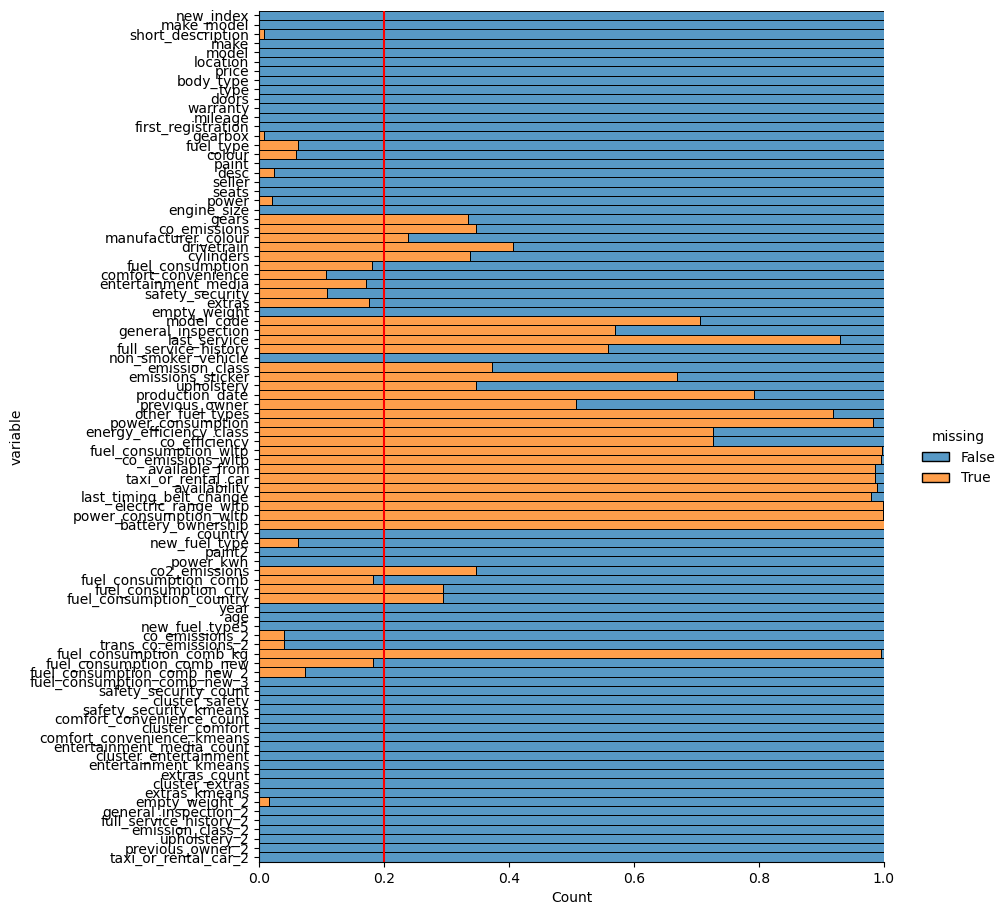

In [258]:
show_nulls(df);

In [259]:
df0 = df.copy()

In [261]:
df.type.value_counts(dropna=False)

Used              25072
Demonstration      1431
Pre-registered     1376
Employee's car      569
Name: type, dtype: int64

In [260]:
df.columns

Index(['new_index', 'make_model', 'short_description', 'make', 'model',
       'location', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'first_registration', 'gearbox', 'fuel_type', 'colour',
       'paint', 'desc', 'seller', 'seats', 'power', 'engine_size', 'gears',
       'co_emissions', 'manufacturer_colour', 'drivetrain', 'cylinders',
       'fuel_consumption', 'comfort_convenience', 'entertainment_media',
       'safety_security', 'extras', 'empty_weight', 'model_code',
       'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'emissions_sticker',
       'upholstery', 'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co_efficiency',
       'fuel_consumption_wltp', 'co_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'electric_range_wltp', 'power_consumption_wltp', 'battery_o

In [278]:
df.drop(columns = ["short_description", "model",'location','first_registration','fuel_type','colour','desc', 'power','gears',\
                  'co_emissions', 'manufacturer_colour','drivetrain','cylinders', 'fuel_consumption', 'comfort_convenience', 'entertainment_media',\
                  'safety_security', 'extras','model_code', 'general_inspection', 'last_service', 'full_service_history', 'emission_class','emissions_sticker',\
                  'upholstery', 'production_date','previous_owner', 'other_fuel_types','power_consumption',\
                  'energy_efficiency_class', 'co_efficiency','fuel_consumption_wltp', 'co_emissions_wltp', 'available_from','taxi_or_rental_car',\
                  'availability', 'last_timing_belt_change','electric_range_wltp', 'power_consumption_wltp', 'battery_ownership',\
                  'new_fuel_type', 'paint2','co2_emissions',\
                  'fuel_consumption_comb', 'fuel_consumption_city','fuel_consumption_country', 'year',\
                  'trans_co_emissions_2', 'fuel_consumption_comb_kg','fuel_consumption_comb_new', 'fuel_consumption_comb_new_2',\
                  'safety_security_count', 'cluster_safety', 'comfort_convenience_count','cluster_comfort',\
                   'entertainment_media_count', 'cluster_entertainment', 'extras_count', 'cluster_extras',\
                  'empty_weight_2'], axis =1, inplace = True)

In [279]:
df.head()

new_index              make_model           make  price body_type  \
0          0     Mercedes-Benz A 160  Mercedes-Benz  16950   Compact   
1          1   Mercedes-Benz EQE 350  Mercedes-Benz  80900   Compact   
2          2  Mercedes-Benz A 45 AMG  Mercedes-Benz  69900   Compact   
3          3  Mercedes-Benz A 35 AMG  Mercedes-Benz  46990   Compact   
4          4  Mercedes-Benz A 45 AMG  Mercedes-Benz  16800   Compact   

             type doors  warranty   mileage    gearbox  paint  seller seats  \
0            Used   5.0         2  120200.0     Manual      1  Dealer   5.0   
1  Pre-registered   4.0         2    5000.0  Automatic      0  Dealer   5.0   
2            Used   5.0         1   18900.0  Automatic      0  Dealer   5.0   
3            Used   5.0         1   18995.0  Automatic      0  Dealer   5.0   
4            Used   5.0         1  197000.0  Automatic      1  Dealer   5.0   

   engine_size  empty_weight  non_smoker_vehicle country  power_kwh  age  \
0       1461.0   1270.000000                   0      ES       66.0  6.0   
1          1.0   1421.658663                   0      ES      215.0  0.0   
2       1991.0   1555.000000                   0      ES      310.0  2.0   
3       1991.0   1455.000000                   0      ES      225.0  2.0   
4       2143.0   1545.000000                   0      ES      100.0  7.0   

  new_fuel_type5  co_emissions_2  fuel_consumption_comb_new_3  \
0         Diesel       98.000000                     3.800000   
1       Electric      138.857637                     5.204747   
2        Benzine      162.000000                     7.540385   
3        Benzine      169.000000                     6.665000   
4         Diesel      138.857637                     4.900000   

  safety_security_kmeans comfort_convenience_kmeans entertainment_kmeans  \
0                    Low                        Low                  Low   
1                    Low                        Low                  Low   
2                    Low                        Low                  Low   
3                    Low                        Low                  Low   
4                    Low                        Low               Medium   

  extras_kmeans  general_inspection_2  full_service_history_2  \
0           Low                     0                       0   
1           Low                     0                       0   
2           Low                     0                       0   
3           Low                     0                       0   
4           Low                     0                       0   

  emission_class_2 upholstery_2 previous_owner_2 taxi_or_rental_car_2  
0           Euro 5        Other            Other                   No  
1           Euro 6        Other            Other                   No  
2           Euro 6        Other            Other                   No  
3           Euro 6        Other            Other                   No  
4           Euro 6        Other            Other                   No

In [280]:
df.shape

(28448, 32)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28629
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_index                    28448 non-null  int64  
 1   make_model                   28448 non-null  object 
 2   make                         28448 non-null  object 
 3   price                        28448 non-null  int64  
 4   body_type                    28448 non-null  object 
 5   type                         28448 non-null  object 
 6   doors                        28448 non-null  object 
 7   warranty                     28448 non-null  int64  
 8   mileage                      28448 non-null  float64
 9   gearbox                      28217 non-null  object 
 10  paint                        28448 non-null  int64  
 11  seller                       28448 non-null  string 
 12  seats                        28448 non-null  object 
 13  engine_size     

In [291]:
df.isna().sum()

new_index                      0
make_model                     0
make                           0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
paint                          0
seller                         0
seats                          0
engine_size                    0
empty_weight                   0
non_smoker_vehicle             0
country                        0
power_kwh                      0
age                            0
new_fuel_type5                 0
co_emissions_2                 0
fuel_consumption_comb_new_3    0
safety_security_kmeans         0
comfort_convenience_kmeans     0
entertainment_kmeans           0
extras_kmeans                  0
general_inspection_2           0
full_service_history_2         0
emission_class_2               0
upholstery_2                   0
previous_o

In [289]:
df.dropna(subset = "gearbox", axis=0,  inplace=True)

In [290]:
df["gearbox"].isna().sum()

0

In [292]:
df.to_excel(r"C:\Users\Adel\Desktop\EDA project\df_no_missing_v1.xlsx")

In [293]:
df.to_csv(r"C:\Users\Adel\Desktop\EDA project\df_no_missing_v1.csv")